In [965]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, chi2_contingency, spearmanr, pearsonr, f_oneway, kruskal, pointbiserialr
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [966]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [967]:
import warnings
warnings.filterwarnings("ignore")

# 1. Reading and Preprocessing

In [968]:
df = pd.read_csv('drive/MyDrive/data.csv', encoding='UTF-8', sep=';', skipinitialspace=True)
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [969]:
df.head(10)

год время_года                       климат  город страна  \
0  2011.0       Лето  Cубтропический океанический  Техас    США   
1  2011.0       Лето  Cубтропический океанический  Техас    США   
2  2011.0       Лето  Cубтропический океанический  Техас    США   
3  2011.0       Лето  Cубтропический океанический  Техас    США   
4  2011.0       Лето  Cубтропический океанический  Техас    США   
5  2011.0       Лето  Cубтропический океанический  Техас    США   
6  2011.0       Лето  Cубтропический океанический  Техас    США   
7  2011.0       Лето  Cубтропический океанический  Техас    США   
8  2011.0       Лето  Cубтропический океанический  Техас    США   
9  2011.0       Лето  Cубтропический океанический  Техас    США   

   способ_охлаждения режим_при_смешанном_типе_охлаждения способ_обогрева  \
0  Кондиционирование                                 NaN             NaN   
1  Кондиционирование                                 NaN             NaN   
2  Кондиционирование                                 NaN             NaN   
3  Кондиционирование                                 NaN             NaN   
4  Кондиционирование                                 NaN             NaN   
5  Кондиционирование                                 NaN             NaN   
6  Кондиционирование                                 NaN             NaN   
7  Кондиционирование                                 NaN             NaN   
8  Кондиционирование                                 NaN             NaN   
9  Кондиционирование                                 NaN             NaN   

   возраст  пол  ...  скорость_воздуха  рост вес  занавески вентилятор  окно  \
0     22.0  NaN  ...              0.26   NaN NaN        1.0        1.0   NaN   
1     40.0  NaN  ...              0.12   NaN NaN        0.0        0.0   NaN   
2     42.0  NaN  ...              0.08   NaN NaN        0.0        0.0   NaN   
3     27.0  NaN  ...             27.16   NaN NaN        1.0        1.0   NaN   
4     46.0  NaN  ...             63.83   NaN NaN        1.0        1.0   NaN   
5     27.0  NaN  ...              0.21   NaN NaN        1.0        1.0   NaN   
6     32.0  NaN  ...              0.10   NaN NaN        1.0        1.0   NaN   
7     30.0  NaN  ...              0.09   NaN NaN        0.0        0.0   NaN   
8     43.0  NaN  ...              0.15   NaN NaN        1.0        1.0   NaN   
9     43.0  NaN  ...              0.34   NaN NaN        0.0        0.0   NaN   

   двери  отопление  среднемесячная_температура_на_улице  \
0    NaN        NaN                                 28.9   
1    NaN        NaN                                 84.0   
2    NaN        NaN                                 32.8   
3    NaN        NaN                                 28.9   
4    NaN        NaN                                 32.8   
5    NaN        NaN                                 28.9   
6    NaN        NaN                                 32.8   
7    NaN        NaN                                 32.8   
8    NaN        NaN                                 32.8   
9    NaN        NaN                                 31.7   

   количество_рекламаций  
0                      0  
1                      0  
2                      0  
3                      1  
4                      0  
5                      0  
6                      0  
7                      0  
8                      0  
9                      0  

[10 rows x 30 columns]

In [970]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   год                                          484 non-null    float64
 1   время_года                                   484 non-null    object 
 2   климат                                       484 non-null    object 
 3   город                                        484 non-null    object 
 4   страна                                       484 non-null    object 
 5   способ_охлаждения                            484 non-null    object 
 6   режим_при_смешанном_типе_охлаждения          337 non-null    object 
 7   способ_обогрева                              222 non-null    object 
 8   возраст                                      413 non-null    float64
 9   пол                                          412 non-null    object 
 10  ощ

* Firstly, there are errors in the values of the categorical factors.
* Second, there are omissions in some factors where they should not be.
* Third, **year and age** should be an integer type and Boolean values should be a categorical type

The preprocessing stage will solve these problems

In [971]:
previous_shape = df.shape
previous_shape

(484, 30)

Save the primary number of rows and columns of the dataset before processing

<Axes: >

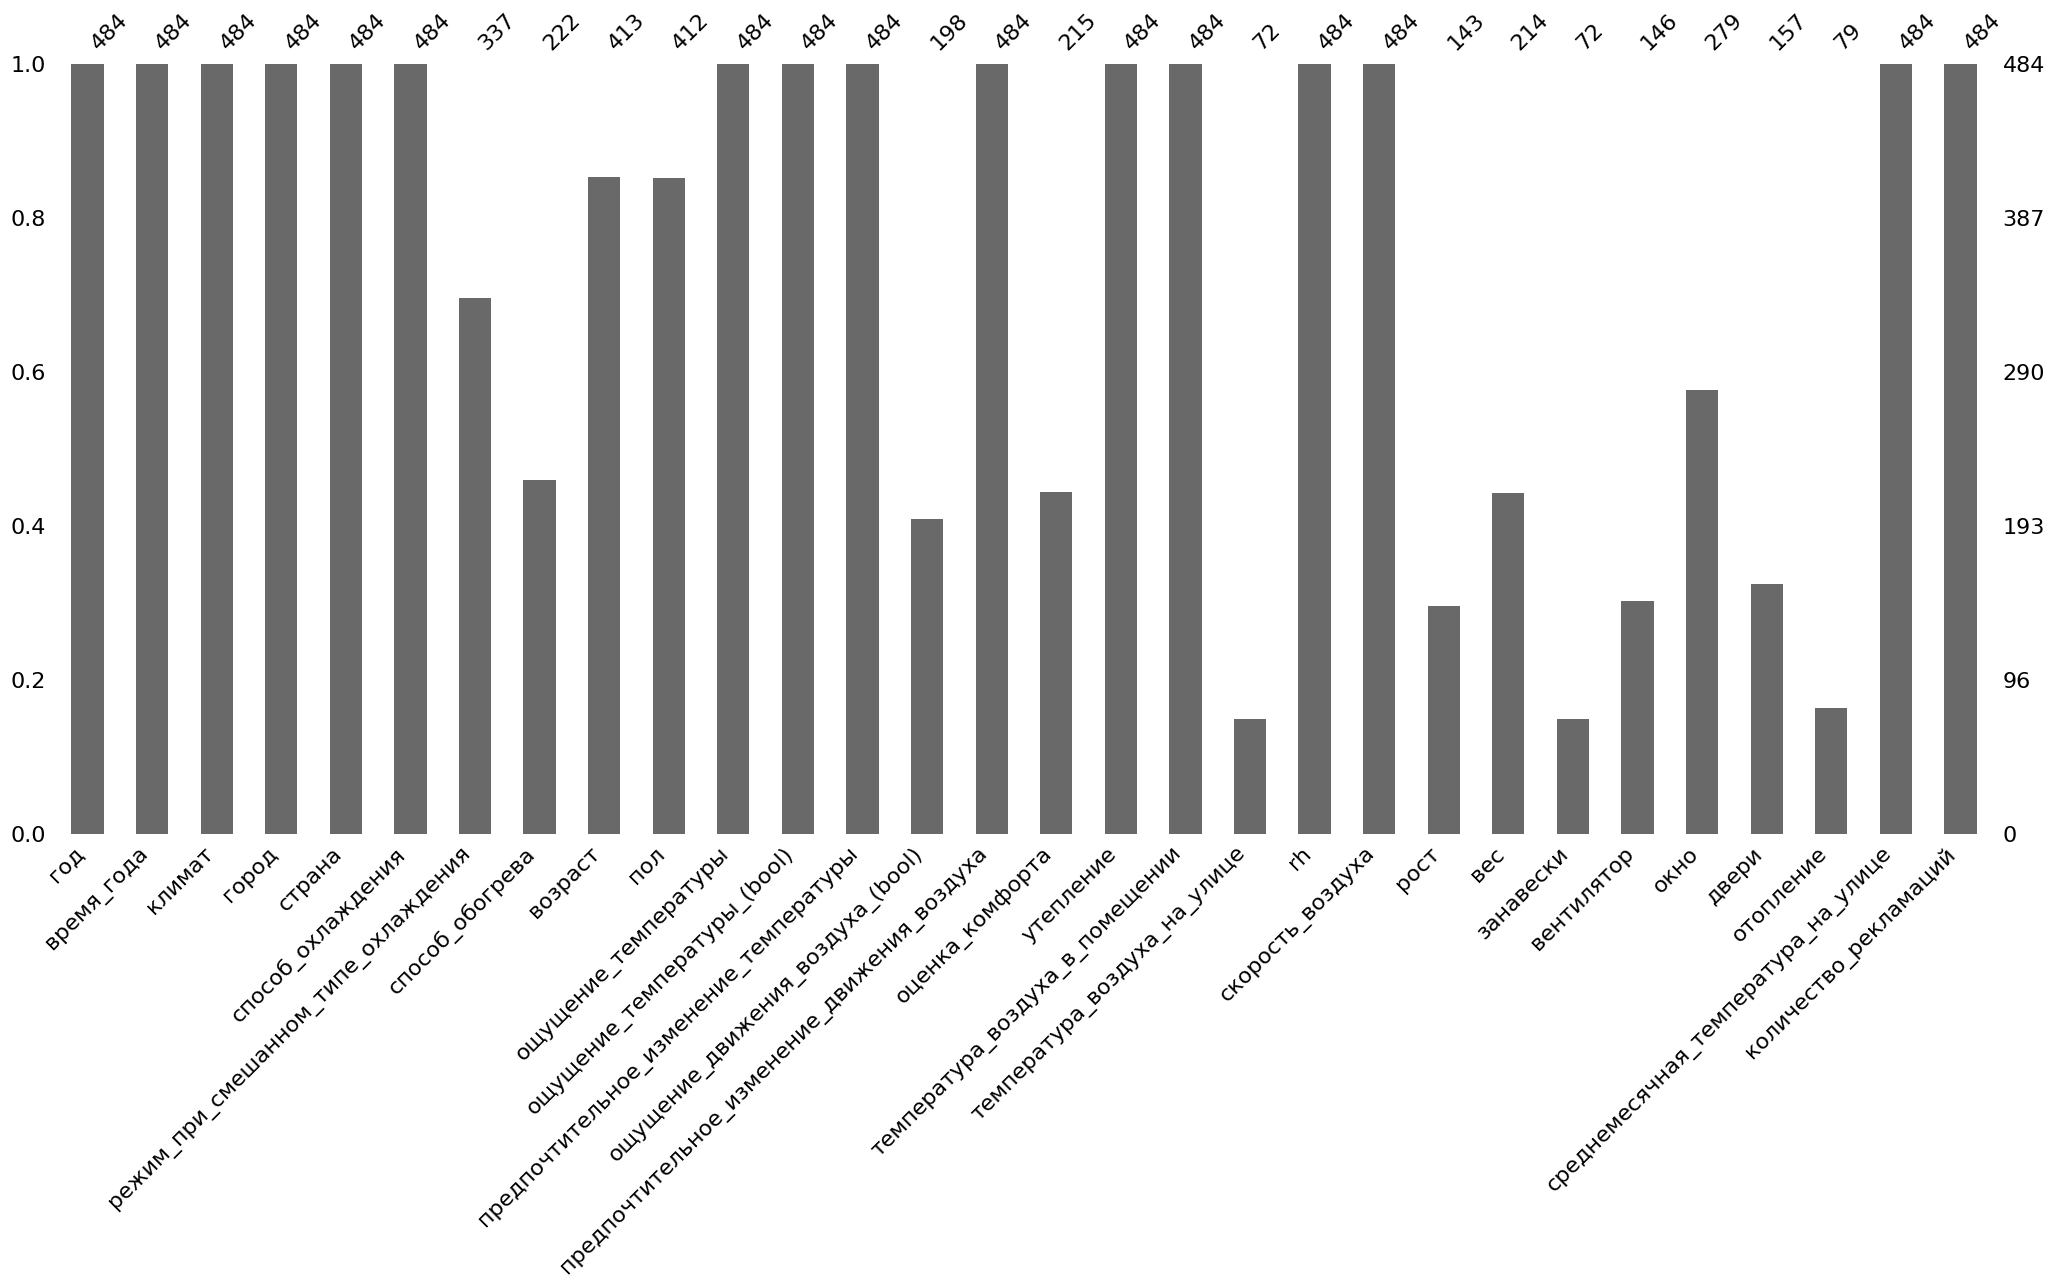

In [972]:
msno.bar(df)

From the blanks:
* We will need to fill in the gaps in the factor gender and age
* The factors height and weight of the respondent will need to be deleted

In [973]:
deleted_data = 0

Variable for counting the percentage of deleted data

## Duplicates

In [974]:
df[df.duplicated()]

год время_года                 климат       город страна  \
482  2012.0       Зима  Жаркий полузасушливый  Хайдарабад  Индия   
483  2012.0       Зима  Жаркий полузасушливый  Хайдарабад  Индия   

    способ_охлаждения режим_при_смешанном_типе_охлаждения способ_обогрева  \
482         Смешанный                   Кондиционирование             NaN   
483         Смешанный                   Кондиционирование             NaN   

     возраст      пол  ...  скорость_воздуха  рост   вес  занавески  \
482      NaN  Женский  ...              0.02   NaN  76.0        NaN   
483      NaN  Женский  ...              0.02   NaN  76.0        NaN   

    вентилятор  окно  двери  отопление  среднемесячная_температура_на_улице  \
482        NaN   0.0    0.0        NaN                                 21.6   
483        NaN   0.0    0.0        NaN                                 21.6   

     количество_рекламаций  
482                      0  
483                      0  

[2 rows x 30 columns]

We see that there are two identical lines, we can delete them, leaving the first line so that there are no duplicates.

In [975]:
deleted_data += (df.duplicated().sum() / df.shape[0]) * 100
df.drop_duplicates(keep='first', inplace=True)

In general, duplicates may appear due to different reasons: an error in entering data into the database; perhaps one and the same person acts as a respondent (he was interviewed several times) and his answers are entered into the database several times.

## Factor errors

In [976]:
def replace_mistakes(df, column_name, old, new):
    """Function for filling errors in categorical factor values"""
    mask = df[column_name] == old
    df.loc[mask, column_name] = new

In [977]:
print(df['климат'].value_counts(), '\n')
print(df['предпочтительное_изменение_температуры'].value_counts())

климат
Cубтропический океанический         269
Тропическая влажная саванна          77
Жаркий полузасушливый                68
Влажный субтропический муссонный     35
Субтропическое высокогорье           32
Cубтроп океанич                       1
Name: count, dtype: int64 

предпочтительное_изменение_температуры
Без изменений    288
Холоднее         132
Теплее            58
Холодн             2
Тепле              2
Name: count, dtype: int64


We can observe errors in the climate and preferred_temperature_change columns

In [978]:
replace_mistakes(df, column_name='климат', old='Cубтроп океанич', new='Cубтропический океанический')
replace_mistakes(df, 'предпочтительное_изменение_температуры', old='Холодн', new='Холоднее')
replace_mistakes(df, 'предпочтительное_изменение_температуры', old='Тепле', new='Теплее')

Replaced errors in categorical columns(implicit duplicates), let's now look at omissions

## Change of variable types

In [979]:
df['год'] = df['год'].astype('int64')
try:
    df['возраст'] = df['возраст'].astype('int64')
except Exception:
    print('Проведем смену типа переменных в факторе возраст после заполнения пропусков в факторах возраст')

Проведем смену типа переменных в факторе возраст после заполнения пропусков в факторах возраст


We see that an exception is caught, there are skips in these factors, so we will change their type after removing the skips

In [980]:
for column_name in ['ощущение_температуры_(bool)', 'ощущение_движения_воздуха_(bool)', 'занавески',
                    'вентилятор', 'окно', 'двери', 'отопление', 'оценка_комфорта']:
    df[column_name] = df[column_name].astype('object')

We go through all boolean/two-level factors and change their type to categorical, as they should be two-level categorical factors. We also change the type of the score_comfort factor to categorical, as it is a categorical ordinal data type

## Graphical and analytical data analysis

In [981]:
def get_numeric(df):
    """The function finds and returns the name of the quantitative factors of the dataset"""
    return df.select_dtypes(include=['float64', 'int64']).columns

def draw_categorical(df):
    """Function for plotting all categorical and quantitative discrete (4 and less levels)
    factors in the table data.csv. If a categorical factor has more than 4 unique values,
    a bar chart is drawn, if less - a pie chart."""
    columns = [column for column in df.columns if column not in get_numeric(df) or
               len(df[column].unique()) <= 4]
    f, ax = plt.subplots(5, 4, figsize=(20, 35))
    for i in range(len(columns)):
        x, y = i // 4, i % 4
        if len(df[columns[i]].unique()) <= 4:
            df[columns[i]].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[x, y])
            ax[x, y].set_ylabel('Доля значений')
        else:
            df[columns[i]].value_counts().plot(kind='bar', ax=ax[x, y])
            ax[x, y].set_ylabel('Количество значений')
        ax[x, y].set_xlabel(columns[i], fontsize=15)
        ax[x, y].set_title(f'График по распределению фактора\n{columns[i]}')
    plt.tight_layout()
    plt.show()

def draw_numerical(df):
    """Function for plotting graphs for quantitative factors in a table
    data.csv. Draws Boxes with whiskers and Histograms with distribution density"""
    columns = [column for column in get_numeric(df) if len(df[column].unique()) > 4]
    f, ax = plt.subplots(5, 4, figsize=(20, 35))
    for i in range(len(columns)):
        x, y = i // 2, i % 2
        sns.histplot(data=df, x=columns[i], kde=True, ax=ax[x, 2 * y], color='skyblue', edgecolor='black')
        sns.boxplot(data=df, x=columns[i], ax=ax[x, 2 * y + 1], color='lightgreen')
        ax[x, 2 * y].set_ylabel('Распределение значений')
        ax[x, 2 * y + 1].set_ylabel('Распределение значений')
        ax[x, 2 * y].set_xlabel(columns[i], fontsize=15)
        ax[x, 2 * y + 1].set_xlabel(columns[i], fontsize=15)
        ax[x, 2 * y].set_title(f'График плотности распределения фактора\n{columns[i]}')
        ax[x, 2 * y + 1].set_title(f'Ящик с усами по распределению фактора\n{columns[i]}')
    plt.tight_layout()
    plt.show()

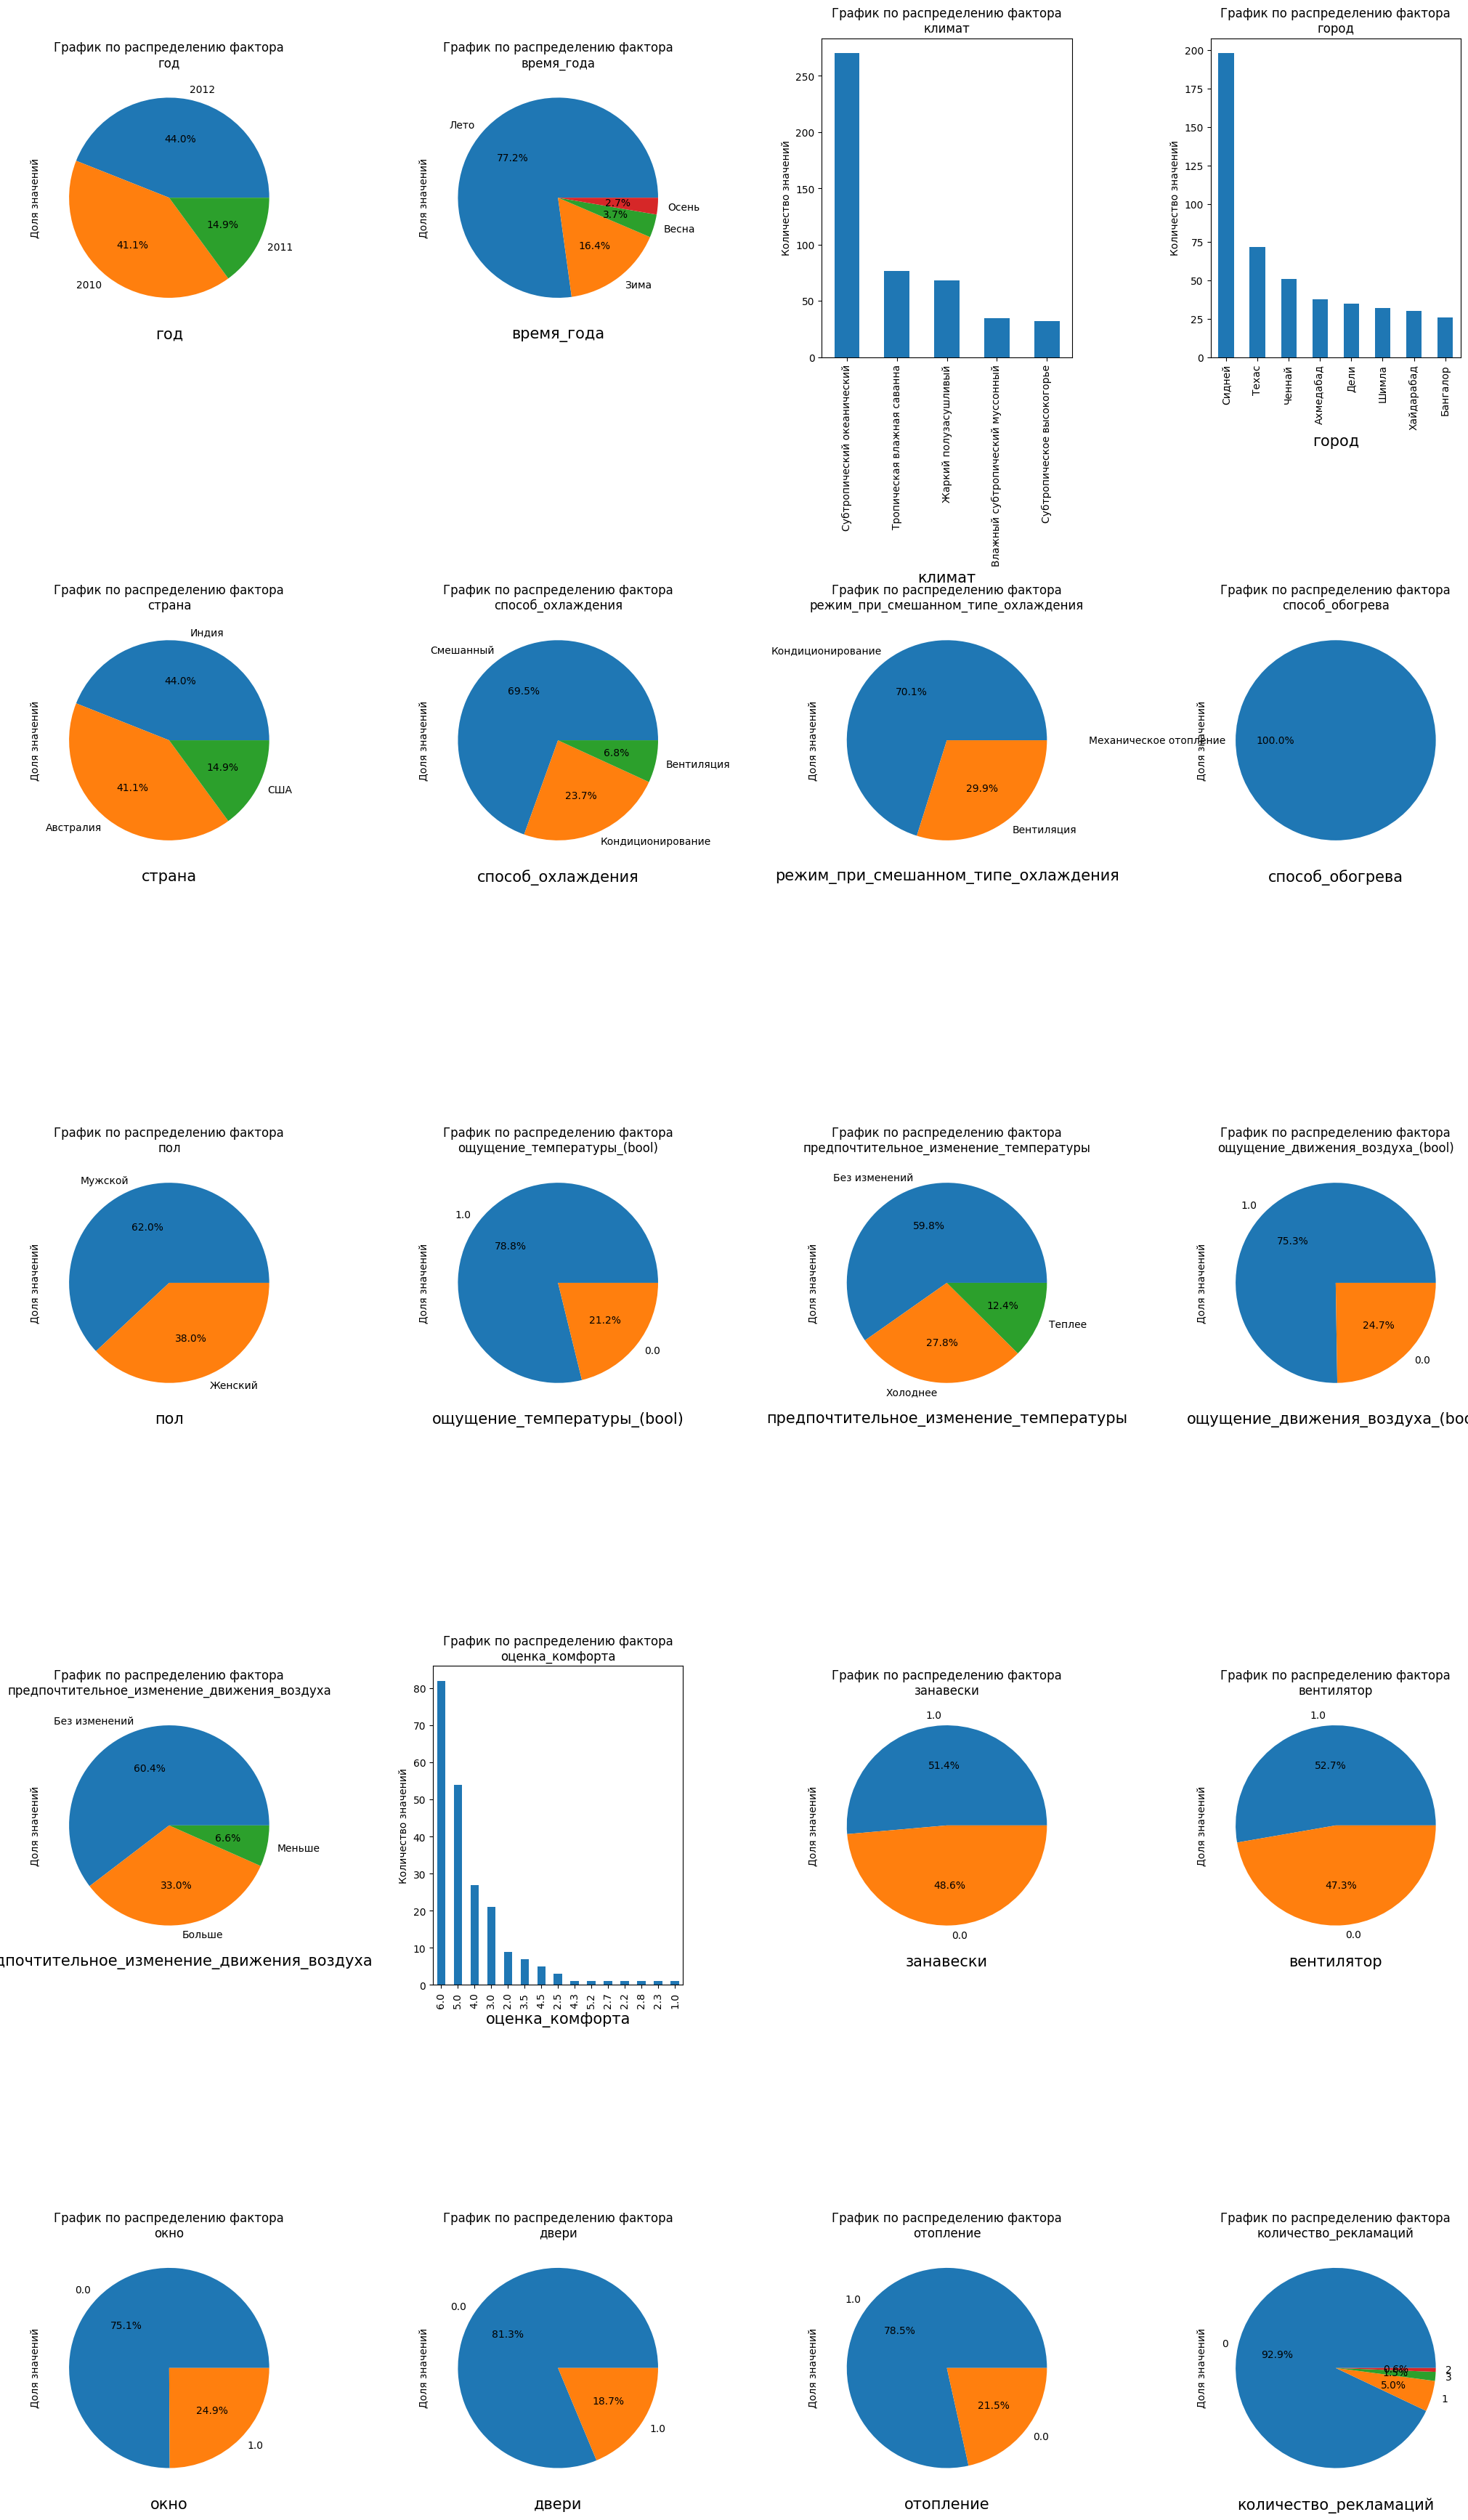

In [982]:
draw_categorical(df)

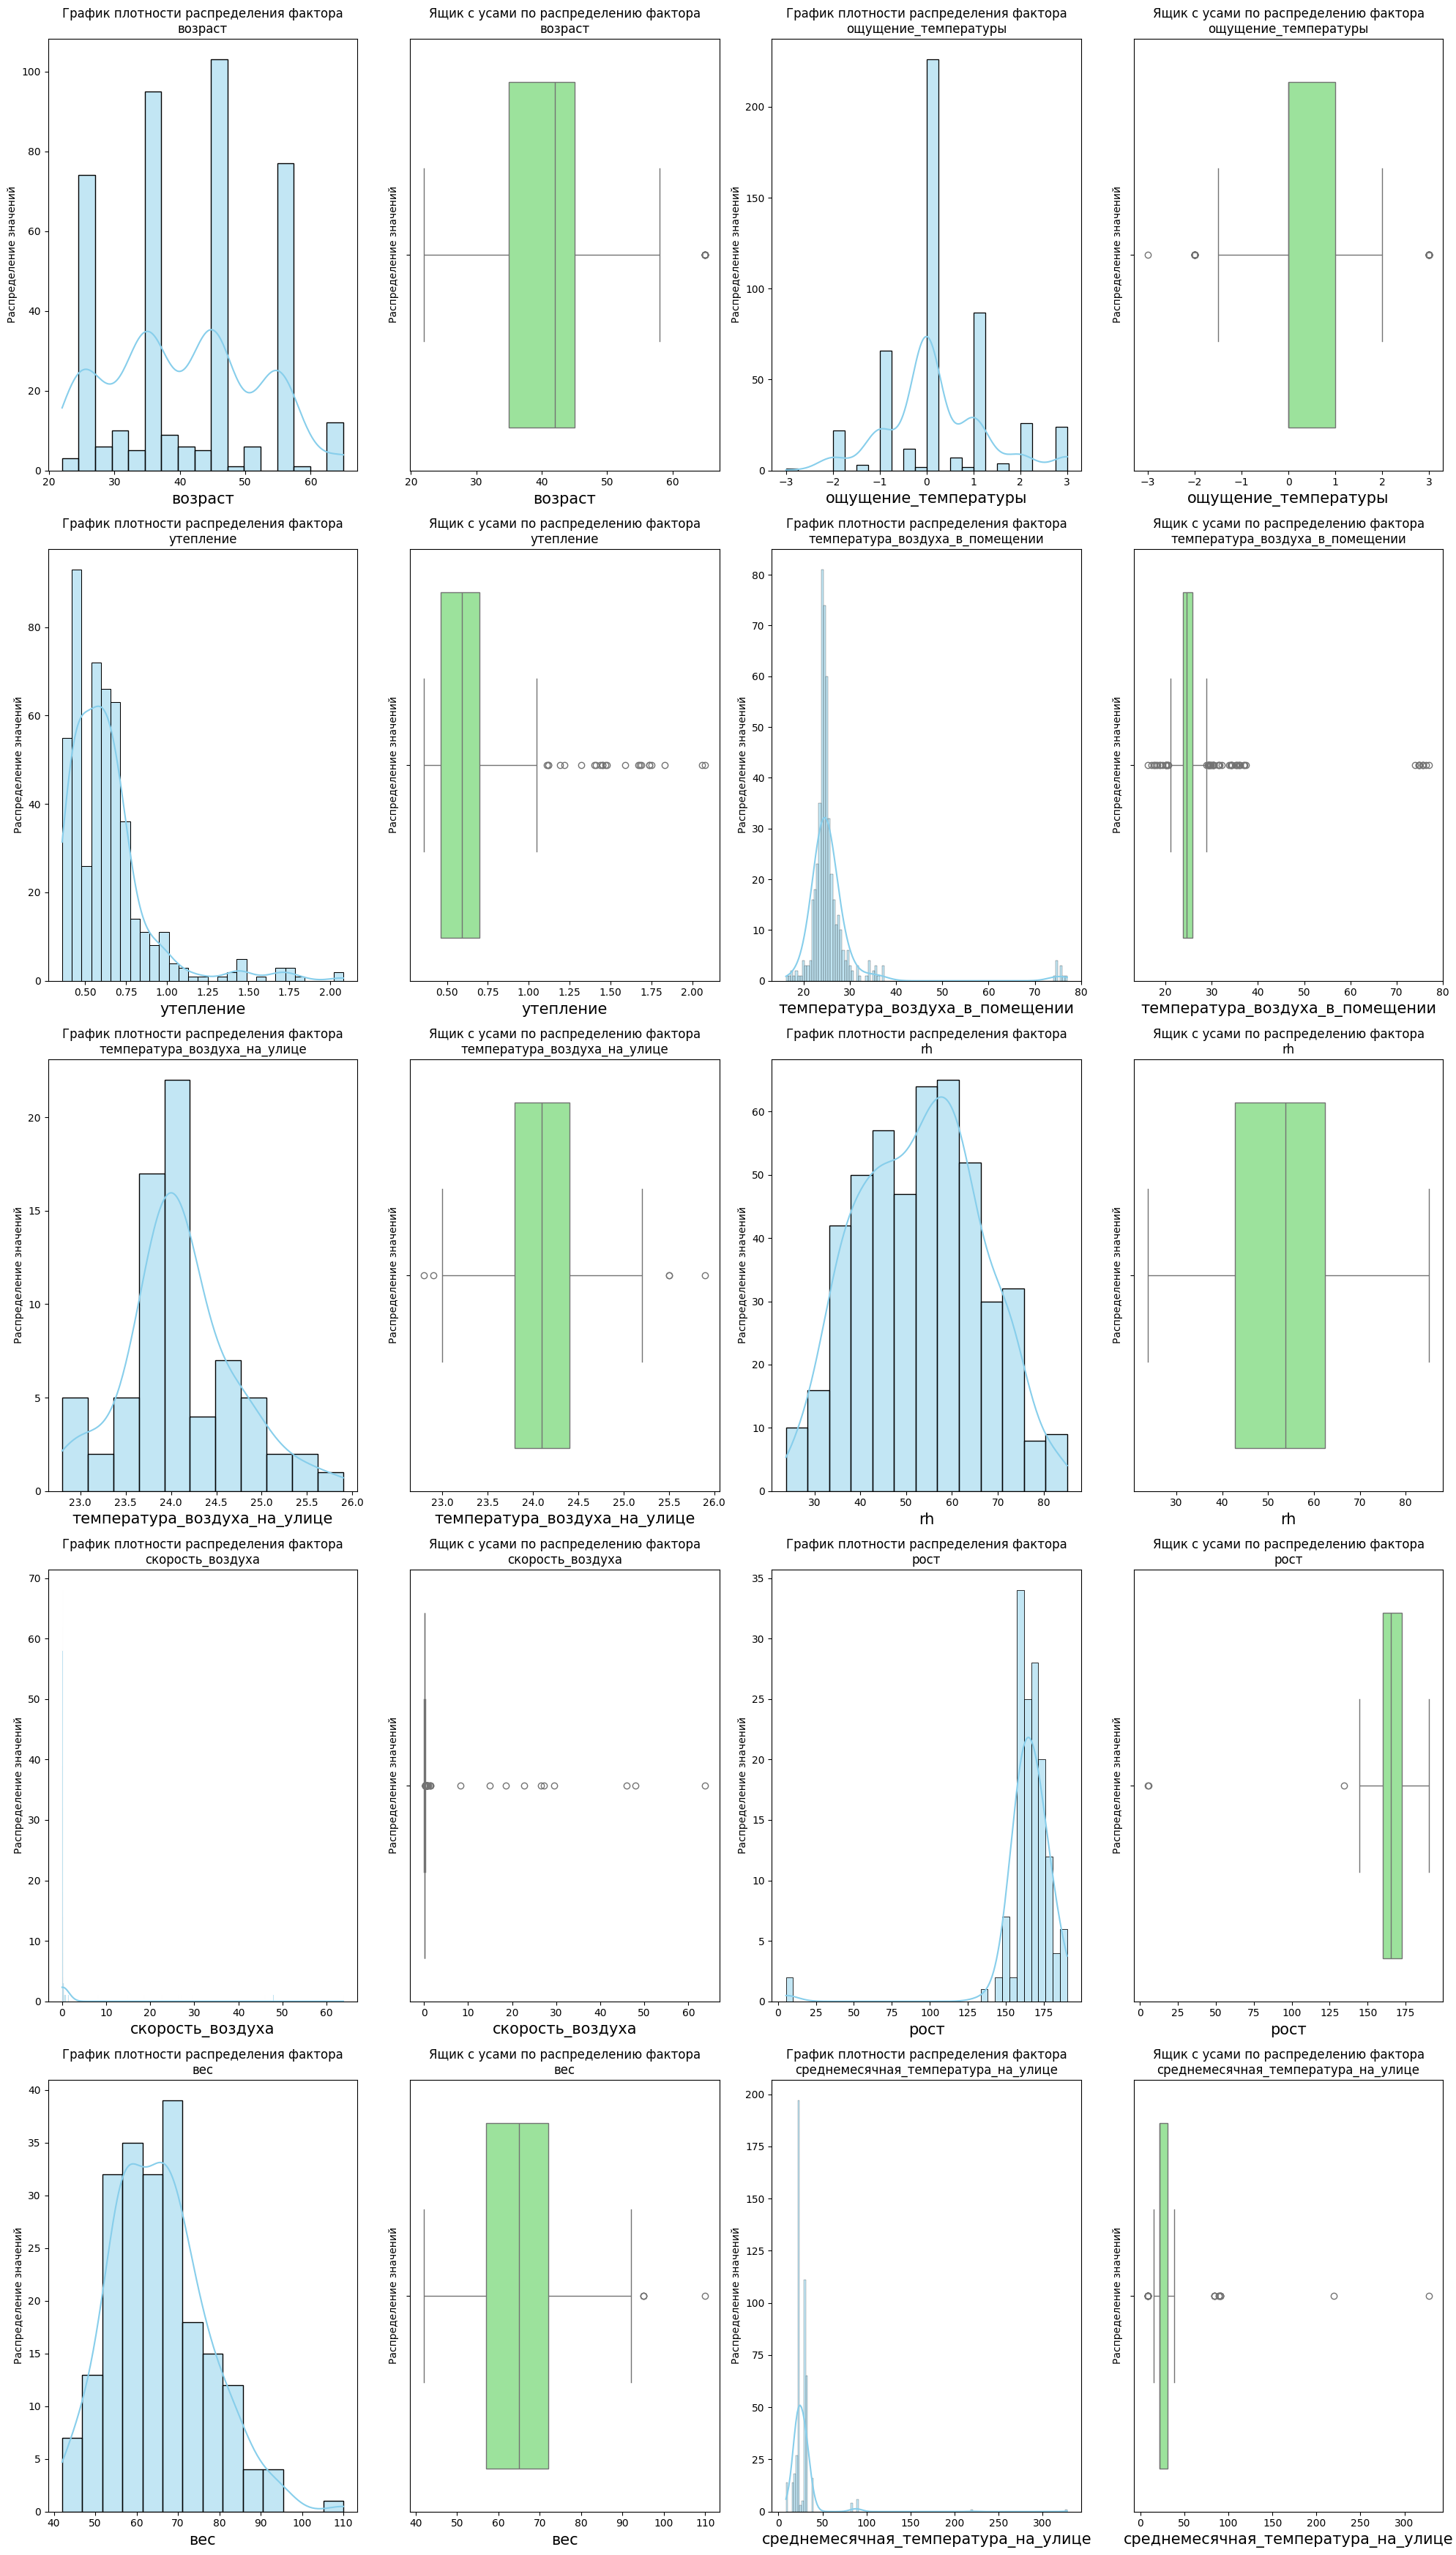

In [983]:
draw_numerical(df)

### Output by graphs
1.   We can see that most of the data was collected in Summer.
2.   The most common climate is Subtropical Oceanic.
3.   In total, mixed type of cooling is the most common type of cooling by a margin(70%). Within the mixed type of cooling, air conditioning is more common(70%) than ventilation(30%). For this reason, I hasten to state that air conditioning is overall the most common type of cooling among the respondents.
4.   Most of the respondents from whom information on windows and doors could be collected had open windows and doors.


### Emissions by chart
1.   There is a suspicion of an outlier in the age factor, but we can see that they are, firstly, small, and secondly, they are within reason (65 years old approximately). It is quite possible that there was an elderly person among the respondents.
2.   In the factor of insulation there are already suspicions of a super outlier, but they will not be processed for a number of reasons:
  * Frostiness of respondents. Different people respond to heat or cold in different ways
  * The respondent did not have time to change from a ‘warm’ jacket to a ‘light’ jacket. Perhaps the sudden change in temperature occurred over a short period of time and respondents came in on a hot day wearing warm clothes
3.   In the factor of indoor air temperature there are obvious super outliers, perhaps there was a failure of the device that measures the temperature in the room, because inside the room 70-80 degrees can not be. Most likely these measurements are given in Fahrenheit, need to look into this.
4.   The air velocity factor also has significant super outliers. Since the median value is near 0, I can argue that the air velocity indicates the wind speed inside the room. Therefore, we should remove these super outliers. There cannot be 20+ m/s wind indoors.
5.   In the factor average monthly outdoor temperature there are obvious super outliers, there were definitely failures in the measurement devices, because 100, 200, 300 degrees Celsius can not be outdoors on our planet, perhaps the measurement in Kelvin, but 310 degrees Kelvin is 37 degrees Celsius, and 100 and 200 degrees Kelvin is -50, -150 degrees Celsius. so then there will be steps to work with outliers.

## Emissions

In [984]:
def median_by_group(df, group_name, column_name):
    """Function to find the median over groups,
    returns the dictionary name of the group: the median for this group"""
    ans = {}
    if group_name == '':
        ans = df[column_name].median()
    else:
        for name in df[group_name].unique():
            ans[name] = df.loc[df[group_name] == name, column_name].median()
    return ans

def mode_by_group(df, group_name, column_name):
    """Function to find the mode by group,
    returns the dictionary name of the group: the median for this group"""
    ans = {}
    if group_name == '':
        ans = df[column_name].mode()
    else:
        for name in df[group_name].unique():
            mode_series = df.loc[df[group_name] == name, column_name].mode()
            ans[name] = mode_series.iloc[0] if not mode_series.empty else None
    return ans

def ejection(df, column_name):
    """The function returns the upper and lower bounds for using the method of determining
    emissions using three interquartile ranges"""
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    return {'lower': q1 - iqr * 3, 'upper': q3 + iqr * 3}


def replace_ejection_with_medians(df, group_name, column_name):
    """Function to replace outliers by group median"""
    lower = ejection(df, column_name).get('lower')
    upper = ejection(df, column_name).get('upper')
    medians = median_by_group(df, group_name, column_name)
    if group_name == '':
        mask = (df[column_name] < lower) | (df[column_name] > upper)
        df.loc[mask, column_name] = medians
    else:
        for group_value in df[group_name].unique():
            mask = ((df[column_name] < lower) | (df[column_name] > upper)) & (df[group_name] == group_value)
            df.loc[mask, column_name] = medians[group_value]

In [985]:
for column in ['скорость_воздуха', 'температура_воздуха_на_улице', 'среднемесячная_температура_на_улице']:
    print(f'{column}:\tlower={round(ejection(df, column)["lower"], 2)}, '
          f'upper={round(ejection(df, column)["upper"], 2)}')
    if column == 'температура_воздуха_на_улице' or column == 'среднемесячная_температура_на_улице':
        replace_ejection_with_medians(df, 'город', column)
    else:
        replace_ejection_with_medians(df, 'способ_охлаждения', column)

скорость_воздуха:	lower=-0.14, upper=0.35
температура_воздуха_на_улице:	lower=22.0, upper=26.2
среднемесячная_температура_на_улице:	lower=-4.4, upper=57.2


We replace the superemission in the factor outdoor temperature by the group city, as this factor directly depends on the region. Replace the super-emission in the factor air velocity and fill in the group cooling method, as this factor directly depends on the climate equipment.

In [986]:
df.loc[df['температура_воздуха_в_помещении'] > ejection(df, 'температура_воздуха_в_помещении').get('upper'), 'температура_воздуха_в_помещении']

1      74.8
7      74.8
9      76.4
23     77.0
33     74.9
38     75.5
41     75.7
45     74.0
54     75.7
67     74.9
290    35.3
293    34.1
296    37.0
299    35.2
322    33.7
328    34.3
358    35.9
361    35.8
362    32.2
365    34.4
367    34.3
369    35.5
378    37.4
382    36.2
406    37.1
Name: температура_воздуха_в_помещении, dtype: float64

We can see that the actual emissions are 70+ degrees, let's investigate this further.

In [987]:
df.loc[df['температура_воздуха_в_помещении'] > 70, 'страна'].value_counts()

страна
США    10
Name: count, dtype: int64

We see that these emissions occur in the country of the USA, so these data are most likely given in fahrenheit, let's convert them to Celsius

In [988]:
df.loc[df['температура_воздуха_в_помещении'] > 70, 'температура_воздуха_в_помещении'].map(lambda x: (x - 32) * 5/9)

1     23.777778
7     23.777778
9     24.666667
23    25.000000
33    23.833333
38    24.166667
41    24.277778
45    23.333333
54    24.277778
67    23.833333
Name: температура_воздуха_в_помещении, dtype: float64

Emissions were replaced by a converted temperature value in Celsius

## Empty values

In [989]:
def replace_empty(df, group_name, column_name):
    """The function fills in the gaps with statistics for the group:
    quantitative - median for the group,
    categorical - group mode"""
    if column_name in get_numeric(df):
      medians = median_by_group(df, group_name, column_name)
      for group_value in df[group_name].unique():
              df.loc[df[column_name].isna(), column_name] = medians[group_value]
    else:
      modes = mode_by_group(df, group_name, column_name)
      for group_value in df[group_name].unique():
              df.loc[df[column_name].isna(), column_name] = modes[group_value]

In [990]:
number_of_replaced = 0

In [991]:
print(df['возраст'].isna().sum())
print(df['пол'].isna().sum())

69
72


We see omissions in the factors age and gender. We can replace them with statistics

In [992]:
number_of_replaced += df['возраст'].isna().sum()
number_of_replaced += df['пол'].isna().sum()
number_of_replaced

141

Number of skips that will need to be replaced

### Empty values in the factor age

In [993]:
df.loc[df['возраст'].isna(), 'город'].value_counts()

город
Ченнай        39
Хайдарабад    30
Name: count, dtype: int64

We can notice that all the omissions in the factor age are in two cities Chennai and Hyderabad.

In [994]:
df.loc[df['город'] == 'Ченнай', 'возраст'].value_counts().sum()

12

In Chennai city, only 12 people out of 51 - (23 per cent) have age information.

In [995]:
df.loc[df['город'] == 'Хайдарабад', 'возраст'].value_counts().sum()

0

In Hyderabad city, there is no information at all on the age of respondents (0 out of 30)

Let's build a linear regression model to determine age then

In [996]:
def get_ohe(train, categ):
    """Function for categorization using OneHotEncoder, returns an x_train dataset with the new factors that were categorized"""
    temp_df = pd.DataFrame(data=ohe.transform(train[categ]), columns=ohe.get_feature_names_out())
    data = pd.concat([train.reset_index(drop=True), temp_df], axis=1)
    data = data.drop(columns=categ, axis=1)
    return data

In [997]:
age_df = df.dropna(subset=['возраст'])

X = age_df[['утепление', 'температура_воздуха_в_помещении', 'ощущение_температуры']]
y = age_df['возраст']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

missing_age_indices = df[df['возраст'].isnull()].index
predicted_ages = model.predict(df.loc[missing_age_indices, ['утепление', 'температура_воздуха_в_помещении', 'ощущение_температуры']]).astype(int)

print(predicted_ages[:10])

[41 40 40 40 40 41 40 41 41 40]


We built a linear regression model on the phyla respondent's insulation, room temperature and feeling of temperature, as these factors are more likely to determine a person's age: how warm they dress, how they feel the temperature in the room. These factors vary with the age of the person, the older the person, the more chilly they are.

In [998]:
df.loc[missing_age_indices, 'возраст'] = predicted_ages

We fill in the gaps in the factor age with the predicted value due to the linear regression model.

In [999]:
df['возраст'] = df['возраст'].astype('int64')
df['год'] = df['год'].astype('int64')

### Missing in the ‘gender’ factor

In [1000]:
df.loc[df['пол'].isna(), 'город'].value_counts()

город
Техас    72
Name: count, dtype: int64

We see that all the omissions in the factor gender are concentrated in the city of Texas

In [1001]:
df.loc[df['город'] == 'Техас', 'пол'].value_counts().sum()

0

The city of Texas generally has no gender information at all, so let's look at the US as a whole

In [1002]:
df.loc[df['страна'] == "США", 'пол'].value_counts()

Series([], Name: count, dtype: int64)

And in general, there is no information on gender in the US. This is probably due to the fact that with the current trends, things are complicated with gender in developed countries, especially with the collection of gender information. Therefore, I propose to fill the gender with non-binary value

In [1003]:
df['пол'].fillna('non-binary', inplace=True)

### Missing in the outdoor temperature factor

In [1004]:
number_of_replaced += df['температура_воздуха_на_улице'].isna().sum()
df.loc[df['температура_воздуха_на_улице'].isna(), 'температура_воздуха_на_улице'] = df['среднемесячная_температура_на_улице']

Fill in the blanks in the factor outdoor air temperature by the factor average monthly outdoor temperature

### Removing height and weight factors

In [1005]:
print(f'Процент заполненных значений в факторе рост = {round((1 - df["рост"].isna().mean()) * 100, 1)}%\n'
      f'Процент заполненных значений в факторе вес = {round((1 - df["вес"].isna().mean()) * 100, 1)}%')

Процент заполненных значений в факторе рост = 29.7%
Процент заполненных значений в факторе вес = 44.0%


In [1006]:
deleted_data += (2 * df.shape[0] - df.isna().sum()[['рост', 'вес']].sum()) / (
            df.shape[0] * df.shape[1] - df.isna().sum().sum() + df.isna().sum()[['рост', 'вес']].sum()) * 100

Add to the percentages how many non-empty values in the factors height and weight were deleted

In [1007]:
df.drop(['рост', 'вес'], axis=1, inplace=True)

We delete the factors of height and weight, as they are not significant for building a ‘portrait’ of the respondent, as in the feeling of cold such factors as height and weight are not as significant as age and gender. Moreover, in the omission graph we can notice that the number of data is very small, not exceeding even 50%.

### Final graph

<Axes: >

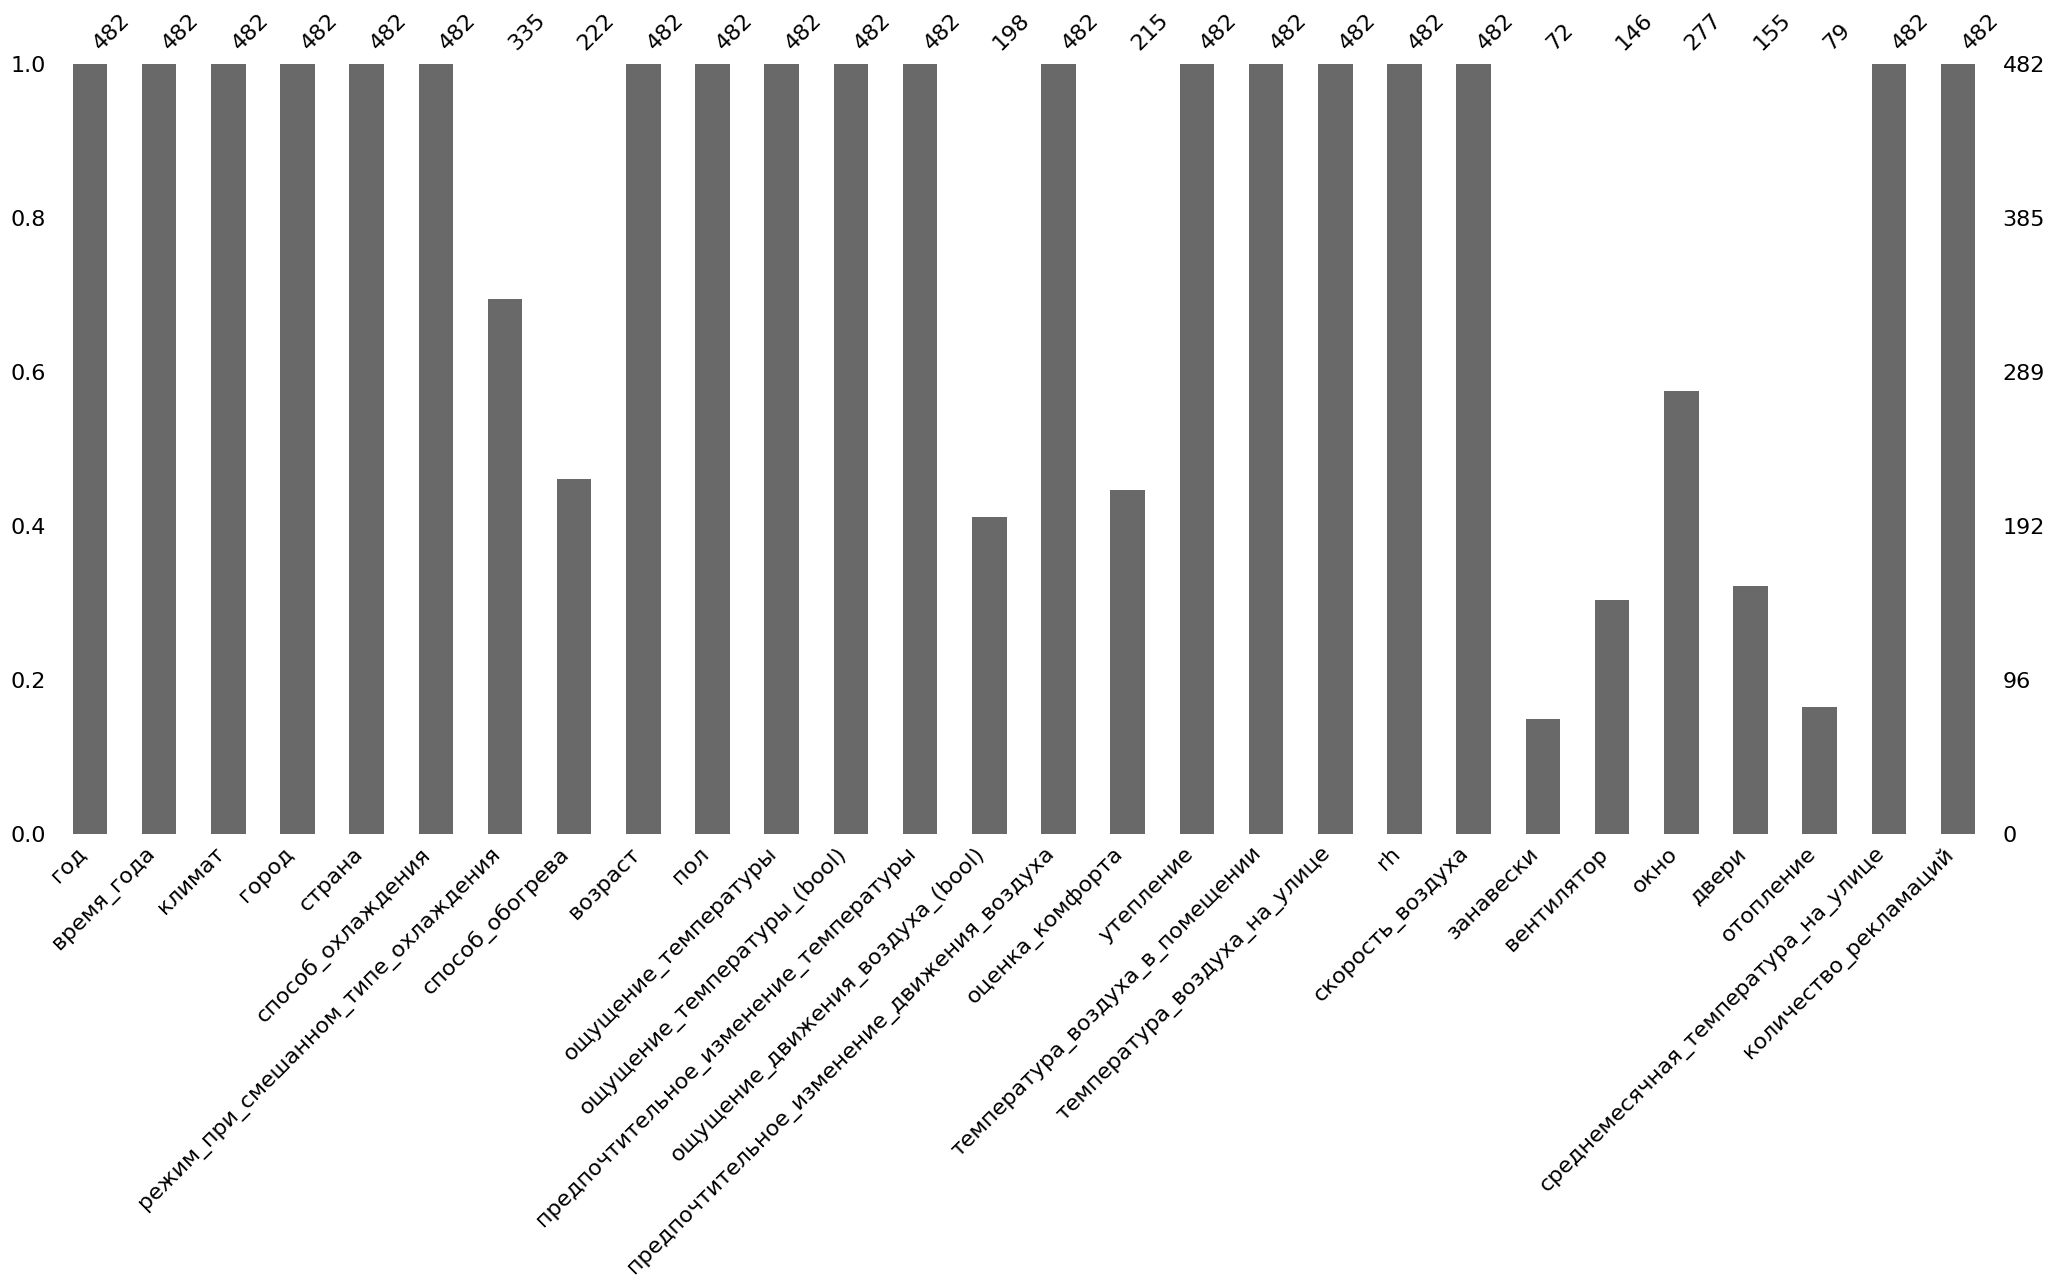

In [1008]:
msno.bar(df)

We can see that the gaps in the factors age, gender did fill in, while the other factors remained unchanged.

## Preprocessing conclusion

In [1009]:
print(f'Было {previous_shape[0]} строк, стало {df.shape[0]} строки.\n'
f'Было {previous_shape[1]} факторов, стало {df.shape[1]} факторов.\n'
f'Заполнили {round(number_of_replaced / (df.shape[0] * df.shape[1]) * 100, 1)}%({number_of_replaced}) пропусков.\n'
f'Удалили такие факторы как: рост, вес\n'
f'Было удалено {round(deleted_data, 1)}% значений из исходных данных'
)


Было 484 строк, стало 482 строки.
Было 30 факторов, стало 28 факторов.
Заполнили 4.1%(551) пропусков.
Удалили такие факторы как: рост, вес
Было удалено 3.4% значений из исходных данных


In [1010]:
def if_normal(df, column_name):
    """Functions for testing for normality of data distribution by the method of
    shapiro method and with a confidence interval of 0.05"""
    statistic, p_value = shapiro(df[column_name])
    if p_value < 0.05:
        return False
    else:
        return True

def make_normality_dict(df):
    """The make_normality_dict function returns a dictionary where the key is the name of the quantitative factor,
    value True/False:Normal/ Abnormal distribution of data in the quantitative factor"""
    normality_dict = {}
    for column_name in get_numeric(df):
        normality_dict[column_name] = if_normal(df=df, column_name=column_name)
    return normality_dict

In [1011]:
normality_dict = make_normality_dict(df)
normality_dict

{'год': False,
 'возраст': False,
 'ощущение_температуры': False,
 'утепление': False,
 'температура_воздуха_в_помещении': False,
 'температура_воздуха_на_улице': False,
 'rh': False,
 'скорость_воздуха': False,
 'среднемесячная_температура_на_улице': False,
 'количество_рекламаций': False}

### Conclusion on normality of data distribution
* All quantitative factors are not normally distributed

# 2. Calculations and research

Let's look at the outlier at age (65) and deal with why this is so.

In [1012]:
df[df['возраст'] > 60].groupby('город')['способ_охлаждения'].value_counts()

город      способ_охлаждения
Ахмедабад  Вентиляция            1
Сидней     Смешанный            11
Name: count, dtype: int64

According to statistics from https://shorturl.at/cF018, the retirement age in Australia is 65. So there are likely to be such workers in offices.
But in India, the retirement age is 60. Probably either the office manager came in that day or someone's uncle/father came to the office and information was collected from him about his feelings that day.
___

Let's investigate what proportion of respondents had complaints about the equipment, which specific equipment were complained about and why?

In [1013]:
complains = df.loc[df['количество_рекламаций'] > 0]
complains.groupby(['способ_охлаждения', 'город'])[['количество_рекламаций']].sum()

количество_рекламаций
способ_охлаждения город                           
Кондиционирование Бангалор                       1
                  Дели                           4
                  Техас                         27
Смешанный         Ахмедабад                     10
                  Дели                           3
                  Сидней                         6

We see that there were no complaints about ventilation equipment in general, which means that ventilation is the most reliable cooling method of all. At the same time, air conditioning received the most complaints, especially in Texas(27). In total, there were 32 complaints about air conditioning. For mixed type of cooling 19, 10 of which were from Ahmedabad.
___
In total air conditioning in Texas, mixed mode in Ahmedabad receive the most complaints.

In [1014]:
complains.loc[complains['город'] == 'Ахмедабад', ['скорость_воздуха', 'температура_воздуха_в_помещении', 'rh', 'ощущение_температуры', 'температура_воздуха_на_улице']]

скорость_воздуха  температура_воздуха_в_помещении    rh  \
273              0.10                             27.5  44.6   
295              0.17                             25.4  46.2   
313              0.08                             25.6  48.0   
341              0.10                             24.0  59.4   
365              0.22                             34.4  44.5   
404              0.09                             30.3  69.8   

     ощущение_температуры  температура_воздуха_на_улице  
273                   1.0                          29.5  
295                   0.0                          29.5  
313                   0.0                          29.5  
341                  -0.5                          29.5  
365                   2.0                          29.5  
404                   0.0                          29.5

We can see that the complaints are chaotic, but there is one eye-catching detail, sometimes the temperature and relative humidity is exorbitant, perhaps the regulators are failing.

In [1015]:
complains.loc[complains['город'] == 'Техас', ['скорость_воздуха', 'температура_воздуха_в_помещении', 'rh', 'ощущение_температуры', 'температура_воздуха_на_улице']]

скорость_воздуха  температура_воздуха_в_помещении    rh  \
3               0.13                             24.2  50.0   
13              0.13                             26.4  31.7   
14              0.13                             23.2  45.2   
18              0.32                             23.8  43.8   
19              0.14                             24.5  34.4   
21              0.10                             25.8  34.5   
23              0.07                             77.0  33.3   
24              0.19                             23.8  39.4   
27              0.07                             25.1  34.2   
28              0.13                             23.9  40.4   
29              0.06                             24.6  34.9   
34              0.17                             24.3  35.0   
38              0.07                             75.5  42.1   
39              0.13                             24.4  34.1   
43              0.21                             24.1  34.8   
48              0.13                             23.8  42.3   
56              0.33                             23.8  44.3   
59              0.13                             24.5  34.1   
60              0.35                             23.8  43.6   
61              0.08                             26.2  30.8   
71              0.18                             24.7  39.5   

    ощущение_температуры  температура_воздуха_на_улице  
3                   -0.5                          23.8  
13                   0.5                          25.5  
14                  -1.5                          23.0  
18                  -2.0                          24.2  
19                   2.0                          24.0  
21                   1.5                          24.9  
23                   1.6                          24.7  
24                   0.0                          23.8  
27                  -0.2                          24.2  
28                  -0.5                          24.6  
29                   0.6                          24.0  
34                   2.0                          24.1  
38                   1.0                          24.3  
39                   2.0                          24.4  
43                   2.0                          24.0  
48                  -1.0                          24.0  
56                  -1.0                          24.1  
59                   2.0                          24.1  
60                  -1.0                          24.1  
61                   1.2                          25.1  
71                   1.0                          24.5

We can see that some respondents feel temperature 2(hot) although the room temperature is normal. This is rather due to the low relative humidity produced by the air conditioners. There were also complaints of too much cold, temperature feeling -2, this is due to the fact that the air velocity is higher than normal. So, sometimes the airflow rate gets out of control. We can also notice that in Texas, the outdoor temperatures were generally comfortable even for an office space. When office temperatures were above street temperatures - they complained of heat, and below street temperatures - they complained of cold.

In [1016]:
df['кат_рекламаций'] = df['количество_рекламаций'].apply(lambda x: 'мало' if x <= 1 else ('средне' if 1 < x <= 2 else 'много'))

Created an additional categorical column that will show the number of complaints for each respondent separately: few if less than equal to 1, medium if between 1 and 2, many if greater than 2.

In [1017]:
df.groupby(['страна', 'пол'])['возраст'].mean().astype('int64')

страна     пол       
Австралия  Женский       46
           Мужской       42
Индия      Женский       37
           Мужской       39
США        non-binary    36
Name: возраст, dtype: int64

Grouped by two criteria ‘country’ and ‘gender’ and found the average age by country. We can see that in the USA there were no female respondents, and in Australia respondents were on average 6-10 years older than respondents from India.

In [1018]:
df['возрастная_группа'] = df['возраст'].apply(lambda x: 'молодой возраст' if x <= 44 else ('средний возраст' if 45 <= x <= 59 else 'пожилой возраст'))

Created a new categorical column age group, by age column, so that I can further work with categorising respondents by age.

In [1019]:
satisfied_df = df[(df['ощущение_температуры'] >= -0.1) & (df['ощущение_температуры'] <= 0.1)]
satisfied_df.groupby(['возрастная_группа'])['температура_воздуха_в_помещении'].mean().apply(lambda x: round(x, 2)).reindex(['молодой возраст', 'средний возраст', 'пожилой возраст'])

возрастная_группа
молодой возраст    25.36
средний возраст    24.06
пожилой возраст    24.93
Name: температура_воздуха_в_помещении, dtype: float64

I grouped and calculated the average comfortable temperature among the age category. The comfort rating was taken on a scale of temperature sensation -0.1 -- 0.1 on a scale from -3 to 3. We can notice that for young and old age comfortable temperature is between 24.8-25 degrees, and for middle-aged respondents comfortable temperature is ~24 degrees.

In [1020]:
df.groupby('способ_охлаждения')[['температура_воздуха_в_помещении', 'rh']].median()

температура_воздуха_в_помещении     rh
способ_охлаждения                                        
Вентиляция                                    25.3  46.30
Кондиционирование                             24.4  42.45
Смешанный                                     24.6  56.50

Grouped and calculated the median value of relative humidity and room temperature for different types of cooling: ventilation, air conditioning and mixed type. It turned out that the lowest temperature value was recorded with air conditioning, but there was the lowest relative humidity. With mixed type, the room temperature was almost the same but the relative humidity was 14% higher, which is a lot. With ventilation, the temperature is 1 degree higher than with air conditioning and the humidity is 4% higher. In other words, I hasten to say that the mixed type is the most optimal of cooling methods, as it has almost the lowest room temperature and is close to the value of 50% relative humidity - the golden mean.

In [1021]:
satisfied_grouped = satisfied_df.groupby(['страна', 'пол'])['температура_воздуха_в_помещении'].count()
all_grouped = df.groupby(['страна', 'пол'])['температура_воздуха_в_помещении'].count()
percentage_grouped = (satisfied_grouped / all_grouped).apply(lambda x: x * 100).round(2).fillna(0)
percentage_grouped = percentage_grouped.rename('процент_удовлетворенности')
percentage_grouped

страна     пол       
Австралия  Женский       44.94
           Мужской       56.88
Индия      Женский       41.79
           Мужской       53.10
США        non-binary    26.39
Name: процент_удовлетворенности, dtype: float64

We find the percentages of satisfaction (temperature feeling -0.1 -- 0.1 on a scale of -3 to 3) of respondents by country and gender. It appears that the USA has a very small percentage of respondents who are satisfied with comfort. In India, men are more satisfied with comfort than women.

In [1022]:
df = df.merge(percentage_grouped, on=['страна', 'пол'], how='left')

Next, add a column for this grouped dataset

In [1023]:
df[['страна', 'пол', 'процент_удовлетворенности']].tail(5)

страна      пол  процент_удовлетворенности
477  Индия  Мужской                      53.10
478  Индия  Мужской                      53.10
479  Индия  Мужской                      53.10
480  Индия  Мужской                      53.10
481  Индия  Женский                      41.79

Added a column with the percentage of respondents satisfied with the indoor air temperature relative to all respondents under the columns ‘country’ and ‘gender’

In [1024]:
pivot_table = pd.pivot_table(df, index=['страна', 'пол', 'возрастная_группа'], values=['температура_воздуха_в_помещении', 'среднемесячная_температура_на_улице', 'rh'], aggfunc='mean').apply(lambda x: round(x, 2))
pivot_table

rh  \
страна    пол        возрастная_группа          
Австралия Женский    молодой возраст    61.37   
                     пожилой возраст    44.55   
                     средний возраст    61.27   
          Мужской    молодой возраст    61.67   
                     пожилой возраст    64.37   
                     средний возраст    61.68   
Индия     Женский    молодой возраст    49.89   
                     средний возраст    49.94   
          Мужской    молодой возраст    49.54   
                     пожилой возраст    78.80   
                     средний возраст    52.76   
США       non-binary молодой возраст    38.99   
                     средний возраст    38.81   

                                        среднемесячная_температура_на_улице  \
страна    пол        возрастная_группа                                        
Австралия Женский    молодой возраст                                  22.00   
                     пожилой возраст                                  22.00   
                     средний возраст                                  22.00   
          Мужской    молодой возраст                                  22.00   
                     пожилой возраст                                  22.00   
                     средний возраст                                  22.00   
Индия     Женский    молодой возраст                                  27.99   
                     средний возраст                                  21.83   
          Мужской    молодой возраст                                  27.45   
                     пожилой возраст                                  29.50   
                     средний возраст                                  22.81   
США       non-binary молодой возраст                                  31.28   
                     средний возраст                                  30.34   

                                        температура_воздуха_в_помещении  
страна    пол        возрастная_группа                                   
Австралия Женский    молодой возраст                              23.84  
                     пожилой возраст                              24.90  
                     средний возраст                              24.11  
          Мужской    молодой возраст                              24.15  
                     пожилой возраст                              24.73  
                     средний возраст                              24.04  
Индия     Женский    молодой возраст                              26.67  
                     средний возраст                              24.23  
          Мужской    молодой возраст                              25.98  
                     пожилой возраст                              29.30  
                     средний возраст                              26.19  
США       non-binary молодой возраст                              31.96  
                     средний возраст                              28.72

Created a summary table by country, gender, and age group using relative humidity, average monthly outdoor temperature, and indoor temperature values


1.  We can see that all of Australia had the same outdoor temperature for all respondents, most likely all were interviewed within the same month. Two genders and all age groups except elderly women(45%),had a relative humidity index of 60 per cent, which is quite high. The indoor temperature was around normal, 24-25C
2.  In India, the relative humidity in both genders and all age groups except elderly men(78.8%, this is too much, there may have been a glitch) was at a very good level, ~50%, which is very good. The same can be said for indoor temperature, it held up well, but again the older men had a poor reading of 29.3 degrees. Also in that month the average outdoor temperature was around 29 degrees, which tells us that the cooling was not working well.
3. The US had very low relative humidity, but cooling worked very well: it maintained a normal temperature of ~24 degrees with an outdoor temperature of 30-31 degrees.


In [1025]:
mask = (df['rh'] >= 40) & (df['rh'] <= 60)
df['стандарт_влажности'] = df['rh'].apply(lambda x: 'мало' if x < 40 else ('хорошо' if 40 <= x <= 60 else 'много'))
df['стандарт_влажности'].value_counts(normalize=True)

стандарт_влажности
хорошо    0.502075
много     0.309129
мало      0.188797
Name: proportion, dtype: float64

I added a three-level categorical column standard_humidity, which has three values: ideal (meets the humidity standard), low and high (does not meet the humidity standard). According to the source https://airwet.ru/tpost/xogv3ijut1-norma-vlazhnosti-vozduha-v-ofise-dlya-ko the standard of relative humidity in the office or other working areas is 40-60%.


We can conclude that about equally the relative humidity meets the standard and does not, which is quite bad.


# 3. Correlation analysis


In [1026]:
def all_correlations(df):
    """
    A function to find the correlation between all pairs of factors of the type 1.quantitative-quantitative and 2.categorical-categorical;
    We use the spearmanr function for the first type of pairs, since in the calculations and research we realized that all quantitative factors are not normally distributed;
    Use the chi2_contingency function to find chi2_contingency, then use Cramer's V coefficient to find correlation.
    Returns the dictionary (factor1, factor2): (correlation, p_value, correlation type). And correlation is rounded to 2 decimal places, p_value to 4 decimal places.
    """
    ans = {}
    columns = df.columns
    numeric = get_numeric(df)
    pairs = []
    for i in range(len(columns) - 1):
        for j in range(i + 1, len(columns)):
            pairs.append((columns[i], columns[j]))

    for pair in pairs:
        correlation_type=''
        first, second = pair[0], pair[1]
        statistic, p_value = 0, 1
        # если оба фактора количественные
        if first in numeric and second in numeric:
            correlation_type = 'numeric'
            statistic, p_value = spearmanr(df[first], df[second])
        # если оба фактора категориальные
        elif first not in numeric and second not in numeric:
            correlation_type='categorical'
            contingency_table = pd.crosstab(df[first], df[second]).fillna(0)
            if not contingency_table.empty:
                chi_2, p_value, _, _ = chi2_contingency(contingency_table)
                statistic = cramer_correlation(chi_2, df, contingency_table)

        ans[pair] = (round(statistic, 2), round(p_value, 4), correlation_type)
    return dict(sorted(ans.items(), key=lambda x: abs(x[1][0]), reverse=True)) # sort by correlation


def cramer_correlation(chi_2, df, contingency_table):
    """
    The function itself to find the Cramer coefficient
    If our summary table has size k x 1 or 1 x k, return 0 so that there is no division by 0
    """
    return round(math.sqrt(chi_2 / (len(df) * (min(contingency_table.shape) - 1))), 4) if min(contingency_table.shape) - 1 != 0 else 0


def data_correlations(d):
    """This function creates a new dataset from that dictionary and returns the first 20 rows of the dataset"""
    data = {'factor_1': [], 'factor_2': [], 'correlation': [], 'p_value': [], 'correlation_type': [],}
    for key, value in d.items():
        data['factor_1'].append(key[0])
        data['factor_2'].append(key[1])
        data['correlation'].append(value[0])
        data['p_value'].append(value[1])
        data['correlation_type'].append(value[2])

    data = pd.DataFrame(data)
    data.dropna(inplace=True)

    return data.head(20)





In [1027]:
dict_of_corrs = all_correlations(df)
correlation_df = data_correlations(dict_of_corrs)
correlation_df

factor_1  \
0                                   климат   
1                                    город   
2             температура_воздуха_на_улице   
3                                      год   
4                                    город   
5                                    город   
6                                   климат   
7                                   страна   
8                                   страна   
9         ощущение_движения_воздуха_(bool)   
10                       способ_охлаждения   
11             ощущение_температуры_(bool)   
12         температура_воздуха_в_помещении   
13                              время_года   
14                                   город   
15  предпочтительное_изменение_температуры   
16                                      rh   
17                        скорость_воздуха   
18                              время_года   
19             ощущение_температуры_(bool)   

                                       factor_2  correlation  p_value  \
0                                         город         1.00      0.0   
1                                        страна         1.00      0.0   
2           среднемесячная_температура_на_улице         0.94      0.0   
3                                     утепление         0.82      0.0   
4                             способ_охлаждения         0.72      0.0   
5                                           пол         0.72      0.0   
6                                        страна         0.71      0.0   
7                                           пол         0.71      0.0   
8                             способ_охлаждения         0.60      0.0   
9   предпочтительное_изменение_движения_воздуха         0.58      0.0   
10                                          пол         0.53      0.0   
11       предпочтительное_изменение_температуры         0.52      0.0   
12                 температура_воздуха_на_улице         0.49      0.0   
13                                        город         0.47      0.0   
14                           стандарт_влажности         0.47      0.0   
15  предпочтительное_изменение_движения_воздуха         0.44      0.0   
16                    процент_удовлетворенности         0.44      0.0   
17          среднемесячная_температура_на_улице         0.44      0.0   
18                                       страна         0.43      0.0   
19  предпочтительное_изменение_движения_воздуха         0.43      0.0   

   correlation_type  
0       categorical  
1       categorical  
2           numeric  
3           numeric  
4       categorical  
5       categorical  
6       categorical  
7       categorical  
8       categorical  
9       categorical  
10      categorical  
11      categorical  
12          numeric  
13      categorical  
14      categorical  
15      categorical  
16          numeric  
17          numeric  
18      categorical  
19      categorical

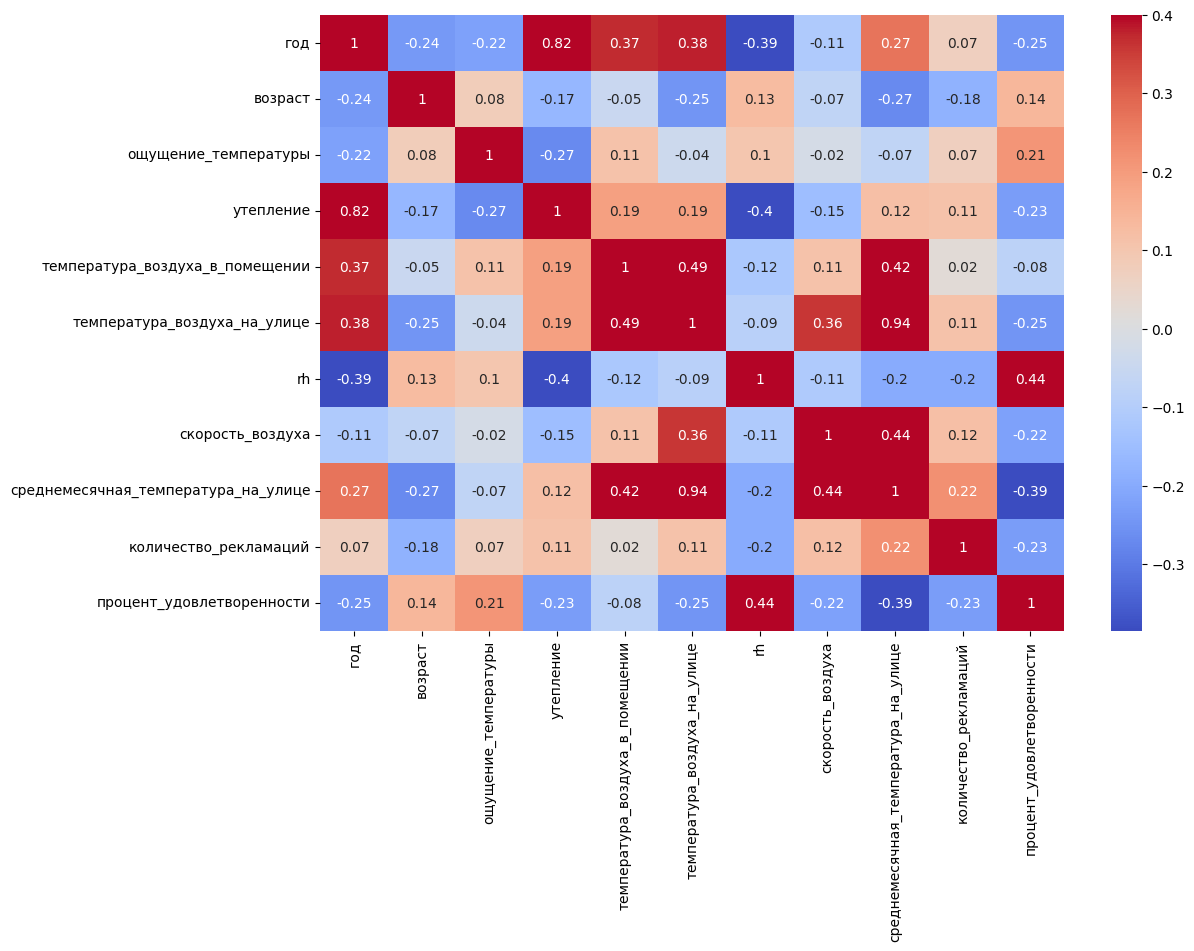

In [1028]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=round(df[get_numeric(df)].corr(method='spearman'), 2), annot=True, cmap='coolwarm', vmin=0.4, vmax=-0.35)
plt.show()

We can also note the correlation percentage_satisfaction-mean monthly_temperature_on_the_street (-0.39)


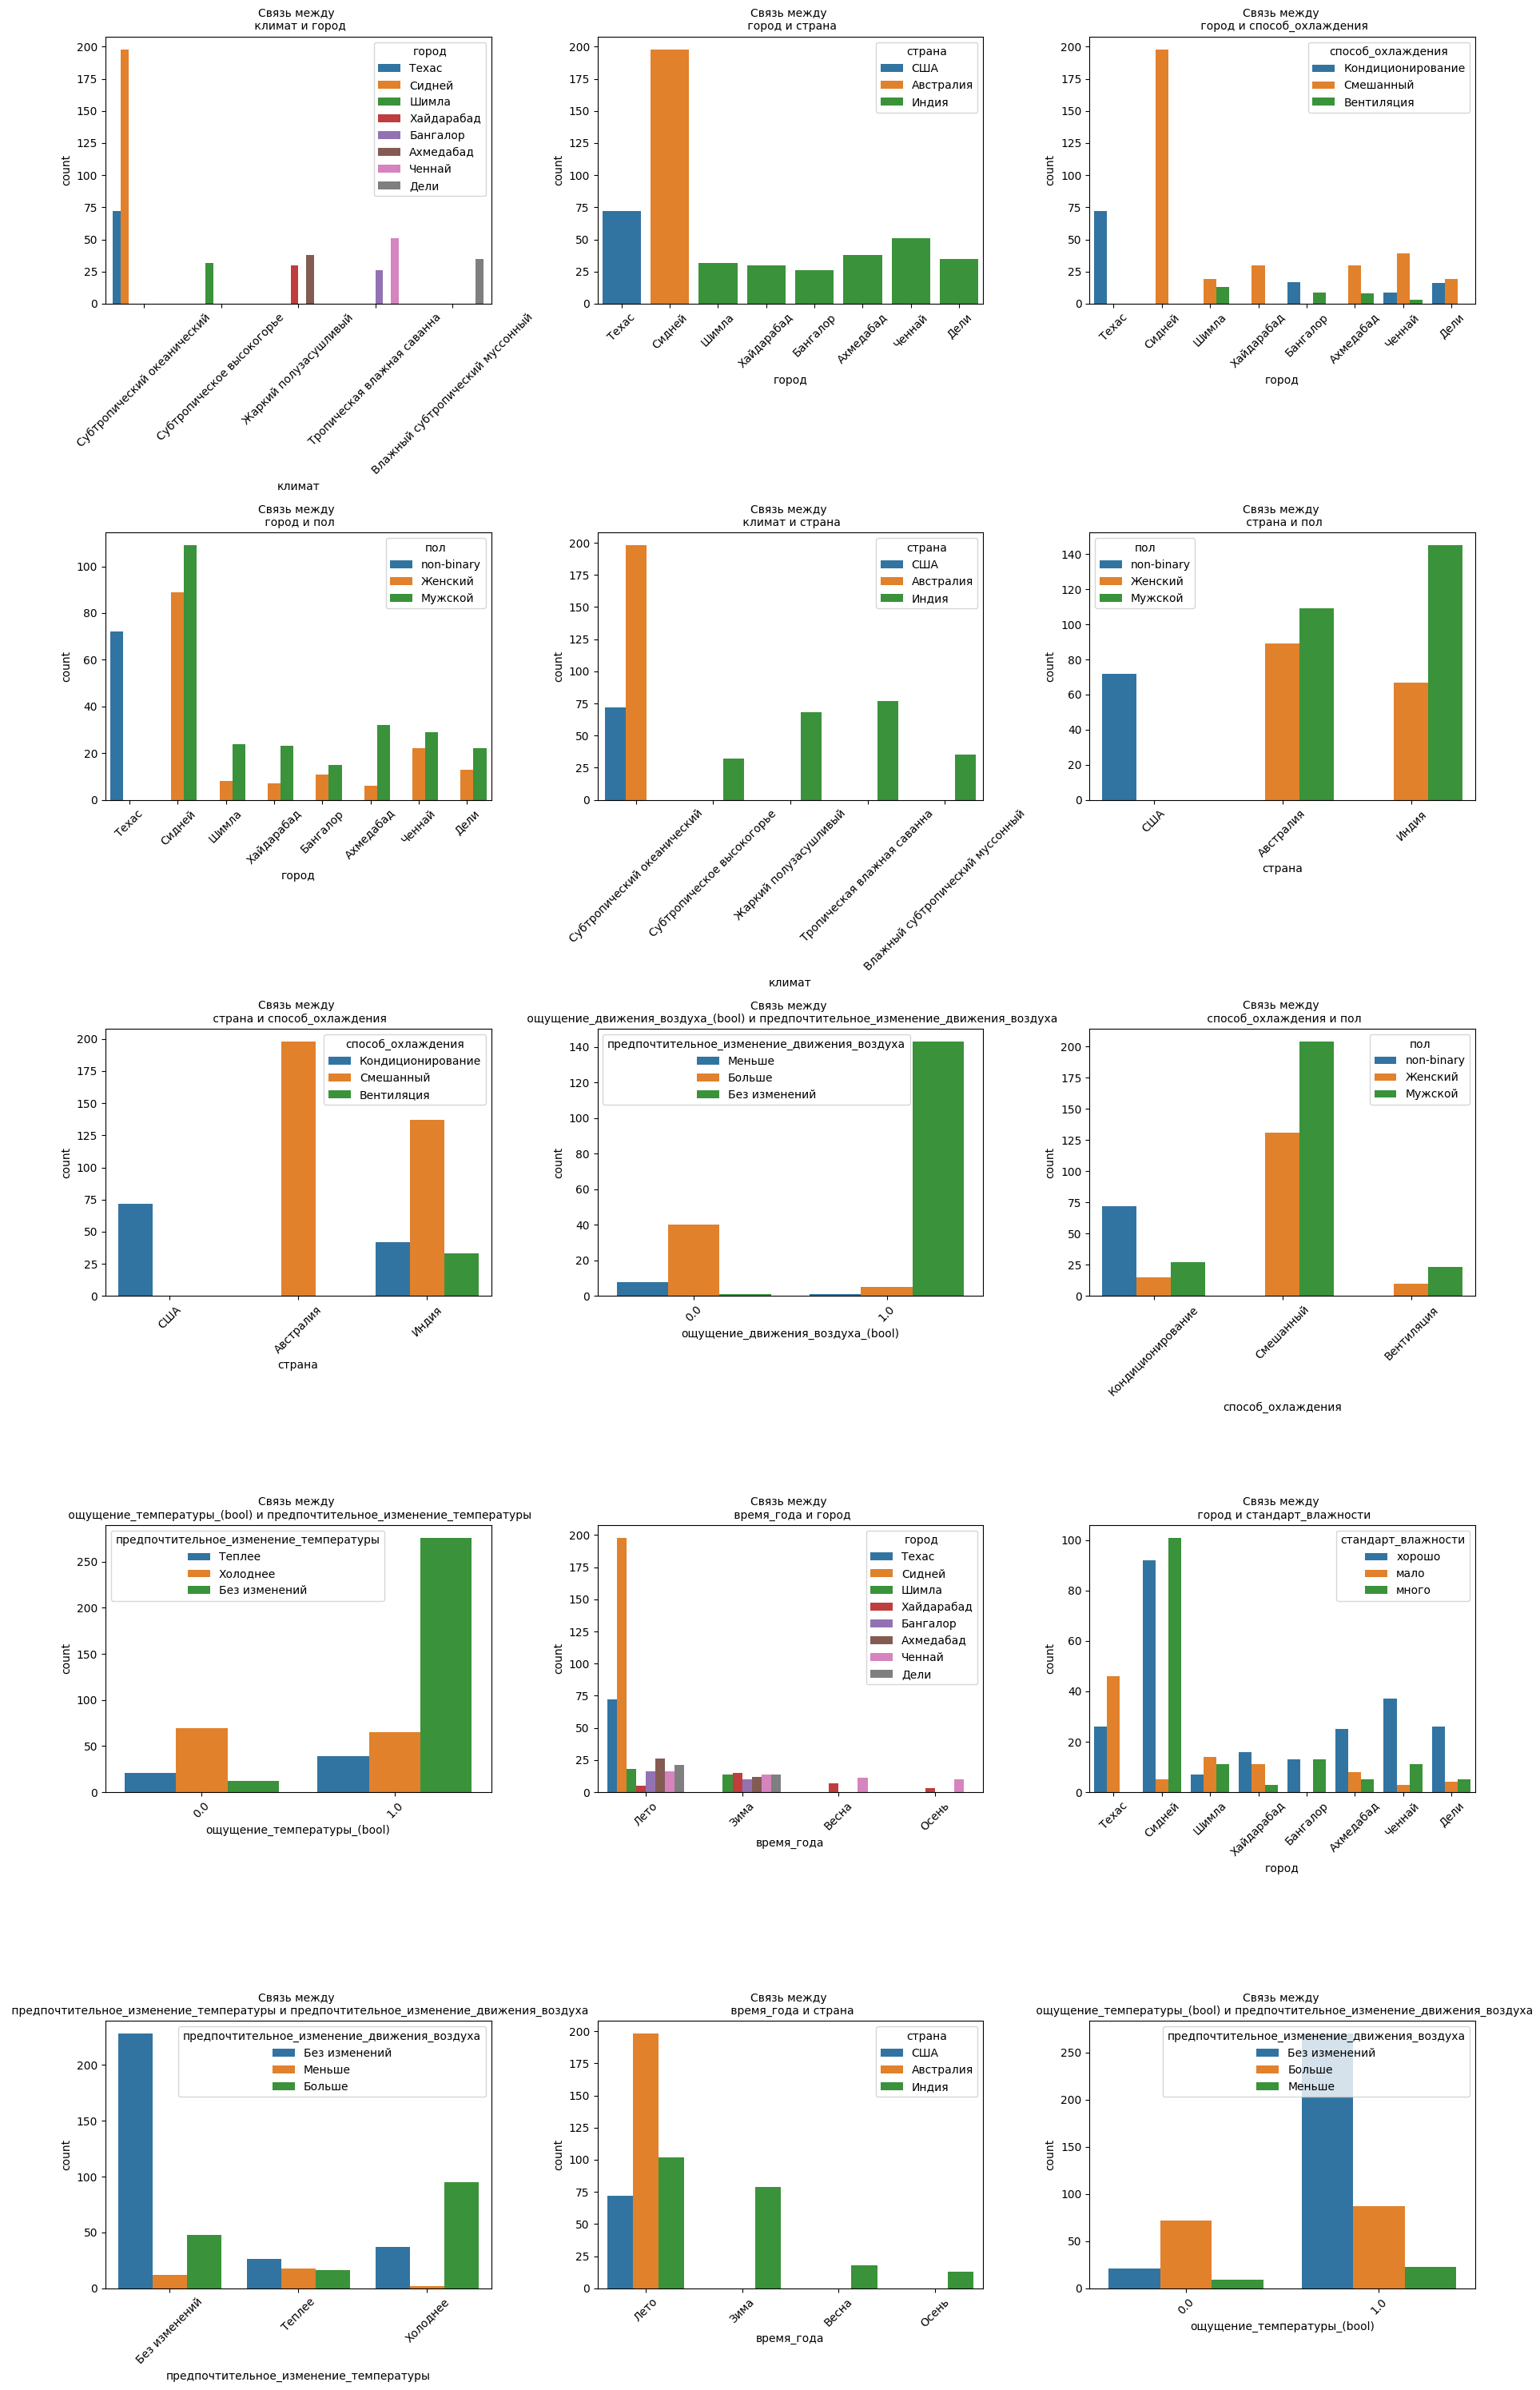

In [1029]:
fig, ax = plt.subplots(5, 3, figsize=(18, 30))
for i, (index, row) in enumerate(correlation_df.loc[correlation_df['correlation_type'] == 'categorical', ['factor_1', 'factor_2']].iterrows()):
    factor1, factor2 = row['factor_1'], row['factor_2']
    sns.countplot(df, x=factor1, hue=factor2, ax=ax[i // 3, i % 3])
    ax[i // 3, i % 3].tick_params(axis='x', labelrotation=45)
    ax[i // 3, i % 3].set_title(f'Связь между \n {factor1} и {factor2}', fontsize=10)

plt.tight_layout()

## Conclusions on correlations
We see that p_value rounded to 4 decimal places in all pairs of factors is 0, so we have grounds to reject the null hypothesis and we can assume that the correlation in all pairs of factors is statistically significant.


### 1
Obviously, climate-city, city-country correlations are equal to 1, because there is only one climate for one city and one city belongs to only one country. Almost the same situation with climate-country(0.71), it is just a feature of the data.


### 2
There is a very strong positive relationship(0.82) between the year of data collection and the respondents' insulation. This may tell us that people started to dress warmer on average each year. But this is more of a peculiarity of the data, as it is possible that in 2010 most of the surveys were conducted in summer, while in other years colder seasons such as spring, autumn or winter were taken into consideration


In [1030]:
for group_value in df['год'].unique():
    print(group_value, '\n', df.loc[df['год'] == group_value, 'время_года'].value_counts(), '\n')

2011 
 время_года
Лето    72
Name: count, dtype: int64 

2010 
 время_года
Лето    198
Name: count, dtype: int64 

2012 
 время_года
Лето     102
Зима      79
Весна     18
Осень     13
Name: count, dtype: int64 


Which was to prove the point, in 2010 there were about 200 respondents in summer, in 2011 also in summer but much less, and in 2012 there was a variety of seasons, so there was a feeling that insulated was so related to the year.


### 3
There is a moderate relationship between city and cooling method(0.72), about the same relationship between country and cooling method(0.60).


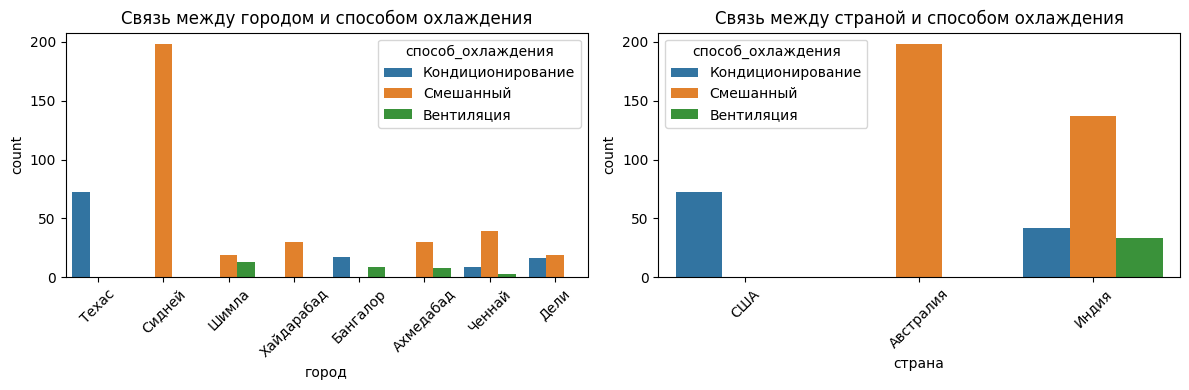

In [1031]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=df, x='город', hue='способ_охлаждения', ax=ax[0])
sns.countplot(data=df, x='страна', hue='способ_охлаждения', ax=ax[1])
ax[0].set_title('Связь между городом и способом охлаждения')
ax[1].set_title('Связь между страной и способом охлаждения')
# Поворачиваем названия городов и стран на 45 градусов для лучшей читабельности
for axx in ax:
    axx.tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.show()

Now it has become clear that the US and Australia use only one method of cooling(air conditioning and mixed respectively)


### 4
1. There is a relationship between airspeed(indoor wind) and monthly average outdoor temperature: this is just a feature of the data.
2. There is also a negative moderate correlation(-0.39) with the average monthly outdoor temperature and the percentage of satisfaction. It tells us that the warmer it is outside, the less satisfied respondents are with their comfort. This means that cooling works poorly.


Text(0.5, 1.0, 'Среднемесячная температура на улице по группе процент удовлетворенности')

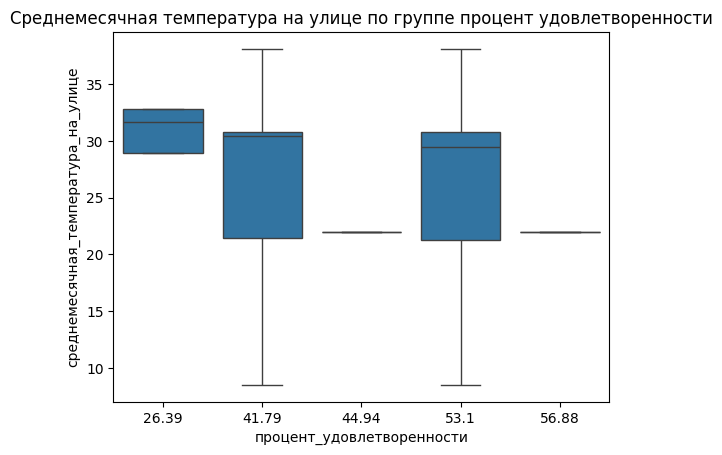

In [1032]:
sns.boxplot(data=df, x='процент_удовлетворенности', y='среднемесячная_температура_на_улице')
plt.title('Среднемесячная температура на улице по группе процент удовлетворенности')

### 5
There is an interesting positive relationship between relative humidity of the room and the percentage of respondent satisfaction(0.44). This means that as the relative humidity increases, the percentage of respondent satisfaction increases. We can conclude that it is worth paying attention to the relative humidity of a certain type of cooling, to reallocate preferences to the cooling method that produces higher relative humidity in the room.


Text(0.5, 1.0, 'Относительная влажность по группе процент удовлетворенности')

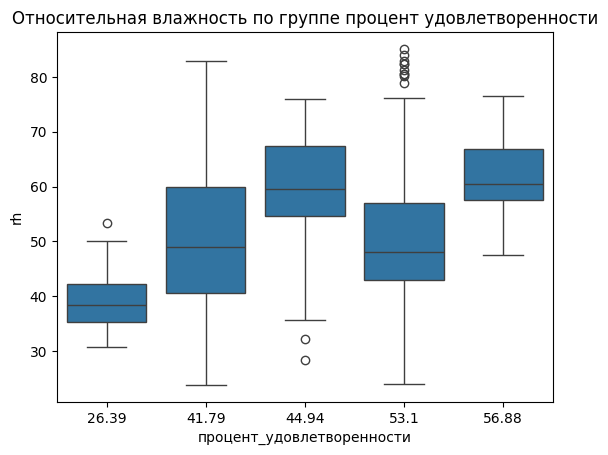

In [1033]:
sns.boxplot(data=df, x='процент_удовлетворенности', y='rh')
plt.title('Относительная влажность по группе процент удовлетворенности')

### 6
The positive moderate correlation between [sensation of air movement(bool)-preferred_change_of_air_movement] and [sensation of temperature (bool)-preferred_change_temperature] is a feature of the data, we cannot draw any conclusions on cooling methods from the relationships of these factors


# 4. Hypothesis testing


In [1034]:
normality_dict

{'год': False,
 'возраст': False,
 'ощущение_температуры': False,
 'утепление': False,
 'температура_воздуха_в_помещении': False,
 'температура_воздуха_на_улице': False,
 'rh': False,
 'скорость_воздуха': False,
 'среднемесячная_температура_на_улице': False,
 'количество_рекламаций': False}

Since all quantitative scales are non-normally distributed, the Mann-Whitney or Kraskell-Wallace test will be used throughout.


In [1035]:
def get_stat_p_val(data, categorical, numerical):
    """
    The function get_p_val returns the p_value of the relationship between the quantitative and categorical factor.
    We use the Mann-Whitney method if the categorical scale has two levels.
    Use the Kraskell-Wallace method if the categorical scale has more than two levels.
    """
    data[numerical] = pd.to_numeric(data[numerical], errors='coerce')
    groups = get_groups(data, categorical, numerical)
    statistic, p_value = 0, 1
    if len(groups) == 2:
        # если двухуровневый, то Манна-Уитни
        statistic, p_value = mannwhitneyu(*groups)
    elif len(groups) > 2:
        # если более двух уровней, то Краскела Уоллеса
        statistic, p_value = kruskal(*groups)
    return f'statistic={round(statistic, 2)} p_value={p_value}'


def plevel_chi2(data, col1, col2):
    """
    The plevel_chi2 function returns the p_value of the relationship between the categorical factor and the categorical factor.
    If an error occurs due to empty strings, return p_value=1
    """
    try:
        contingency_table = pd.crosstab(data[col1], data[col2])
        statistic, p_value, _, _ = chi2_contingency(contingency_table)
    except Exception:
        statistic, p_value = 0, 1
    return f'statistic={round(statistic, 2)} p_value={p_value}'


def get_groups(data, col1, col2):
    """The function get_groups returns the list of grouped by the first factor(col1) values of the second factor(col2)"""
    unique_values = data[col1].dropna().unique()
    groups = [data.loc[data[col1] == group, col2] for group in unique_values]
    return groups

def print_stats(data, col1, col2):
    print(f'Тип данных первого фактора: {data[col1].dtype}\nТип данных второго фактора: {data[col2].dtype}\n')
    if col1 not in get_numeric(data) and col2 not in get_numeric(data):
        print(f'У первого фактора уровней: {len(data[col1].unique())}\nУ второго фактора уровней: {len(data[col2].unique())}')



First things first, let's look at how many respondents did not give a comfort rating


In [1036]:
print(f"Количество не давших оценку комфорта респондентов={df['оценка_комфорта'].isna().sum()}, Процентаж={round(df['оценка_комфорта'].isna().sum() / len(df) * 100, 2)}%")

Количество не давших оценку комфорта респондентов=267, Процентаж=55.39%


Because of so many omissions in the comfort rating factor, I suggest segmenting respondents and only counting those who gave a comfort rating.


In [1037]:
df2 = df[-df['оценка_комфорта'].isna()]
df2.head(5)

год время_года                       климат  город страна  \
0  2011       Лето  Cубтропический океанический  Техас    США   
1  2011       Лето  Cубтропический океанический  Техас    США   
2  2011       Лето  Cубтропический океанический  Техас    США   
3  2011       Лето  Cубтропический океанический  Техас    США   
4  2011       Лето  Cубтропический океанический  Техас    США   

   способ_охлаждения режим_при_смешанном_типе_охлаждения способ_обогрева  \
0  Кондиционирование                                 NaN             NaN   
1  Кондиционирование                                 NaN             NaN   
2  Кондиционирование                                 NaN             NaN   
3  Кондиционирование                                 NaN             NaN   
4  Кондиционирование                                 NaN             NaN   

   возраст         пол  ...  вентилятор окно двери отопление  \
0       22  non-binary  ...         1.0  NaN   NaN       NaN   
1       40  non-binary  ...         0.0  NaN   NaN       NaN   
2       42  non-binary  ...         0.0  NaN   NaN       NaN   
3       27  non-binary  ...         1.0  NaN   NaN       NaN   
4       46  non-binary  ...         1.0  NaN   NaN       NaN   

  среднемесячная_температура_на_улице количество_рекламаций  кат_рекламаций  \
0                                28.9                     0            мало   
1                                31.7                     0            мало   
2                                32.8                     0            мало   
3                                28.9                     1            мало   
4                                32.8                     0            мало   

   возрастная_группа  процент_удовлетворенности  стандарт_влажности  
0    молодой возраст                      26.39              хорошо  
1    молодой возраст                      26.39                мало  
2    молодой возраст                      26.39                мало  
3    молодой возраст                      26.39              хорошо  
4    средний возраст                      26.39                мало  

[5 rows x 32 columns]

### Does the method of cooling affect comfort ratings?


---



In [1038]:
print_stats(df2, 'способ_охлаждения', 'оценка_комфорта')

Тип данных первого фактора: object
Тип данных второго фактора: object

У первого фактора уровней: 3
У второго фактора уровней: 15


* Null hypothesis H0: the categorical variables cooling mode and comfort score are independent.
* Alternative hypothesis H1: the categorical variables cooling mode and comfort score have a relationship


Since both factors are categorical, we choose the chi square method to find the p_value


In [1039]:
plevel_chi2(df2, "способ_охлаждения", "оценка_комфорта")

'statistic=30.32 p_value=0.3481673969162561'

<Axes: xlabel='способ_охлаждения', ylabel='count'>

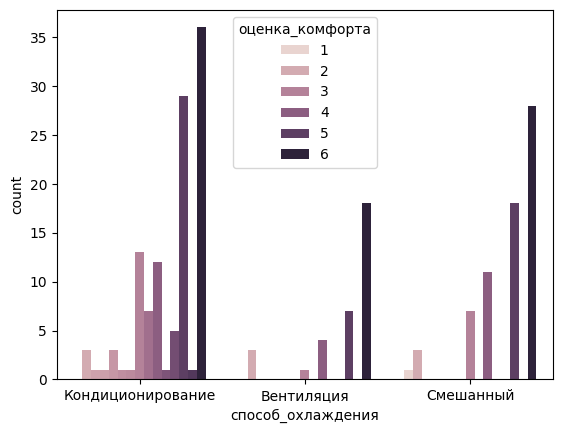

In [1040]:
sns.countplot(data=df2, x='способ_охлаждения', hue='оценка_комфорта')

According to the p_value(0.3482 > 0.05) which we obtained by chi square method, we accept the null hypothesis that the categorical variables cooling method and comfort score are independent.


### Does gender affect comfort scores?

---



In [1041]:
print_stats(df2, 'пол', 'оценка_комфорта')

Тип данных первого фактора: object
Тип данных второго фактора: object

У первого фактора уровней: 3
У второго фактора уровней: 15


* Null hypothesis H0: categorical variables gender and comfort score are independent.
* Alternative hypothesis H1: categorical variables gender and comfort score have a relationship


Here too, gender and comfort score are categorical factors, so we use the chi-square method


In [1042]:
plevel_chi2(df2, "пол", "оценка_комфорта")

'statistic=63.8 p_value=0.00013016765958073193'

<Axes: xlabel='пол', ylabel='count'>

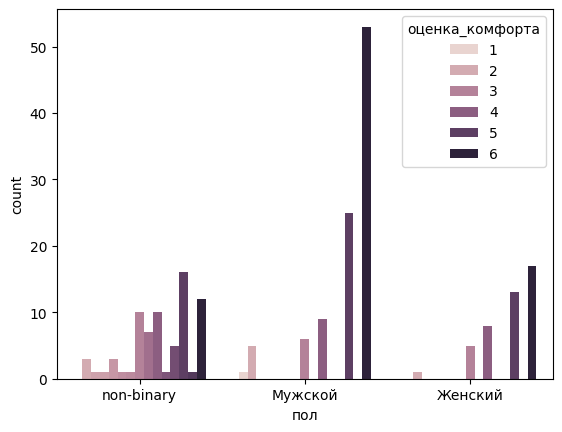

In [1043]:
sns.countplot(df2, x='пол', hue='оценка_комфорта')

According to the p_value(10^-4 < 0.05) which we obtained by chi square method, we reject the null hypothesis that the categorical variables gender and comfort score are independent. They are dependent, with Male gender having a huge advantage of voting most in favour of 6/6 comfort score.


### Does age group influence comfort ratings?


---



In [1044]:
print_stats(df2, 'возрастная_группа', 'оценка_комфорта')

Тип данных первого фактора: object
Тип данных второго фактора: object

У первого фактора уровней: 3
У второго фактора уровней: 15


* Null hypothesis H0: categorical variables age group and comfort score are independent.
* Alternative hypothesis H1: the categorical variables age group and comfort score have a relationship


Here too, age group and comfort score are categorical factors, so we use the chi-square method


In [1045]:
plevel_chi2(df2, "возрастная_группа", "оценка_комфорта")

'statistic=30.74 p_value=0.32870686581672814'

<Axes: xlabel='возрастная_группа', ylabel='count'>

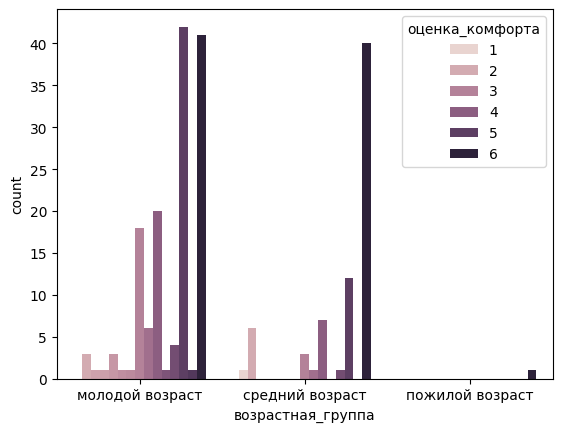

In [1046]:
sns.countplot(df2, x='возрастная_группа', hue='оценка_комфорта')

According to the p_value(0.3287 > 0.05) which we obtained by chi square method, we accept the null hypothesis that the categorical variables age group and comfort score are independent. The p_value > 0.05 indicates that there is not enough data to refute the null hypothesis.


### Is there a correlation between the number of complaints and comfort scores?


---



In [1047]:
print_stats(df2, 'количество_рекламаций', 'оценка_комфорта')
print(f'Количество уровней: {len(df2["оценка_комфорта"].unique())}')

Тип данных первого фактора: int64
Тип данных второго фактора: object

Количество уровней: 15


* Null hypothesis H0: categorical variables age group and comfort score are independent.
* Alternative hypothesis H1: categorical variables age group and comfort score have a relationship


Since the number of complaints is a quantitative factor and the comfort score is a categorical one, we will use the created function get_p_val. The number of levels of the comfort score is 15 > 2, so we use the Kraskell-Wallace method


In [1048]:
get_stat_p_val(df2, numerical='количество_рекламаций', categorical='оценка_комфорта')

'statistic=144.21 p_value=1.0293741672801844e-23'

According to the p_value(10^(-23) < 0.05) which we obtained by the Kraskell-Wallace method, we reject the null hypothesis that the quantitative factor number of complaints and the categorical factor comfort score are independent. There is a relationship between them. And since the value of statistic=144, the relationship is significant.


### Test the hypothesis that the average comfort score differs from country to country


In [1049]:
print_stats(df2, 'страна', 'оценка_комфорта')

Тип данных первого фактора: object
Тип данных второго фактора: object

У первого фактора уровней: 2
У второго фактора уровней: 15


* H0: The mean values of the comfort score do not differ between countries.
* H1: Average comfort scores differ between countries.


Since our question is formulated as whether the average comfort score is different, so we take the comfort score as a quantitative scale.


---
Let us investigate why the country factor has two levels in our respondent segment


In [1050]:
print(df.groupby(['страна'])[['оценка_комфорта']].mean(), '\n\n', df2.groupby(['страна'])[['оценка_комфорта']].mean())

          оценка_комфорта
страна                   
Австралия             NaN
Индия            5.062937
США              4.194444 

        оценка_комфорта
страна                
Индия         5.062937
США           4.194444


We can notice that our respondent segment does not include the country of Australia, as no respondent from Australia gave a comfort rating.


In [1051]:
get_stat_p_val(df2, numerical='оценка_комфорта', categorical='страна')

'statistic=3020.0 p_value=2.7980107480830727e-07'

According to the p_value(2*10^(-7) < 0.05) which we obtained by Mann-Whitney method(two levels in the factor city), we reject the null hypothesis that the mean values of comfort scores across groups are statistically different. Since the averages are different, there is a relationship. Accordingly, it is in our segment of respondents that the mean comfort score between the countries of USA and India differ. Therefore, it can be argued that the average comfort score is highly dependent on the region, as also statistic=3020


### Test the hypothesis that the average sense of temperature differs from country to country


In [1052]:
print_stats(df, 'страна', 'ощущение_температуры')

Тип данных первого фактора: object
Тип данных второго фактора: float64


In [1053]:
print(df['страна'].value_counts(), '\n\n', df['страна'].value_counts().sum())

страна
Индия        212
Австралия    198
США           72
Name: count, dtype: int64 

 482


We see that there are definitely no omissions in the feeling of comfort, as in the assessment of comfort. And the feeling of temperature also indirectly affects the feeling of comfort. So I think this hypothesis will allow us to conclude more accurately


* H0: Average temperature sensation values do not differ by country.
* H1: Average temperature sensation values differ by country.


In [1054]:
get_stat_p_val(df, categorical='страна', numerical='ощущение_температуры')

'statistic=42.8 p_value=5.070744502746438e-10'

According to the p_value(5*10^(-10) < 0.05) which we obtained by Mann-Whitney method(two levels in the factor city), we reject the null hypothesis that the mean values of temperature perception across groups are statistically different. Since the averages are different, there is a relationship. It can be argued that on average the sense of comfort depends very much on the region, since there are also statistic several tens(42)


#### Is there a relationship between relative humidity and temperature sensation?


In [1055]:
print_stats(df, 'rh', 'ощущение_температуры')

Тип данных первого фактора: float64
Тип данных второго фактора: float64


* H0: No relationship between two quantitative factors
* H1: There is a relationship between two quantitative factors

---



Since both factors are quantitative and all quantitative factors in the dataset are non-normally distributed, we use the spearman method


In [1056]:
statistic, p_value = spearmanr(df['ощущение_температуры'], df['rh'])
print(round(statistic, 2), p_value)

0.1 0.02926815958305712


Since p_value=0.03<0.05, we can refute the null hypothesis and accept the alternative hypothesis that there is a relationship between relative humidity and temperature sensation. But, since **statistic** is close to zero, the relationship is very weak.


#### Is there a relationship between airspeed and comfort rating?


In [1057]:
print_stats(df2, 'оценка_комфорта', 'скорость_воздуха')

Тип данных первого фактора: float64
Тип данных второго фактора: float64


* H0: No relationship between two quantitative factors
* H1: There is a relationship between two quantitative factors


In [1058]:
statistic, p_value = spearmanr(df2['скорость_воздуха'], df2['оценка_комфорта'])
print(round(statistic, 2), p_value)

-0.29 1.5185235071053097e-05


Since p_value=4 * 10^(-6) <0.05, we can refute the null hypothesis and accept the alternative hypothesis that there is a relationship between air speed and temperature sensation. But, since the absolute value of **statistic** is between 0.2-0.4, the relationship is weak.


# Linear Regression model


In [1063]:
features=['климат', 'город', 'способ_охлаждения', 'возраст',
       'ощущение_температуры',
       'предпочтительное_изменение_температуры',
       'температура_воздуха_на_улице', 'rh', 'скорость_воздуха', 'занавески',
       'среднемесячная_температура_на_улице', 'количество_рекламаций', 'возрастная_группа']
categorical_features= [x for x in features if x not in get_numeric(df)]

Let us select the factors that can potentially influence the room temperature. Note that the factor ‘country’ is unnecessary, as there is a factor ‘city’, which is a more accurate characterisation. Having gone through the factors, we remove those that do not affect the regression result.


In [1064]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df[['температура_воздуха_в_помещении']], test_size=0.15, random_state=42)

ohe = OneHotEncoder(sparse_output=False, drop='first')
ohe.fit(x_train[categorical_features])

x_train = get_ohe(x_train, categorical_features)
x_test = get_ohe(x_test, categorical_features)
lin_regr = LinearRegression()
lin_regr.fit(x_train, y_train)
prediction = lin_regr.predict(x_test)

print(f'R2 = {round(r2_score(y_test, prediction), 2)}\nMAPE = {round(mean_absolute_percentage_error(y_test, prediction) * 100, 2)}%')

R2 = 0.23
MAPE = 9.93%


### Conclusion of the regression model
According to the results of the model we built, the best result obtained in this way is R = 0.25 and MAPE = 9.93%. This means that the target room temperature depends on the chips we selected by only 25% with a mean error of 9.93%. This is not a good performance for the model, the model is very weak.
___
To improve the model, it is likely to work on qualitative information gathering.


# CONCLUSIONS
---



## On data preprocessing:
Removed 2 duplicate rows, 2 factors: height, weight(3.4% of all data). A total of 551 missing values were replaced with statistics. This is approximately 4.1% of all data collected. In total 7.5% of the data was preprocessed, which is not insignificant.
* The factors height and weight were removed, because this information does not affect the portrait of the respondent as much. Moreover, there were a huge number of omissions in these factors. For these reasons it was decided to remove these two factors
* Replaced age due to the linear regression model, sex in the US was closed with the value ‘non-binary’ because the topic of sex in the US is complicated.

---


## By statistically significant relationships:


In [1061]:
df.groupby(['способ_охлаждения'])[['rh', 'температура_воздуха_в_помещении']].median()

rh  температура_воздуха_в_помещении
способ_охлаждения                                        
Вентиляция         46.30                             25.3
Кондиционирование  42.45                             24.4
Смешанный          56.50                             24.6


* There is a moderate positive relationship(0.44) between relative humidity in the room and the percentage of respondents' satisfaction, which tells us that the more relative humidity the cooling method produces, the more satisfied the respondents are. Therefore, it is worth looking at the mixed cooling method, the method that produces the highest relative humidity.
* There is also a negative moderate correlation (-0.39) with the average monthly outdoor temperature and the percentage of satisfaction. It tells us that the warmer it is outside, the less satisfied respondents are with their comfort. So, cooling in terms of temperature is not working well, so there is a balance to be struck between relative humidity and low temperature, which again proves the advantage of mixed method of cooling over others.


## By region:
Since no one in the region of Australia gave a comfort rating, we will base this on the factor of feeling the temperature as the main indicator of respondent comfort, where -3 is cold, 3 is hot.


In [1062]:
df.groupby('страна')['ощущение_температуры'].mean().map(lambda x: round(x, 2))

страна
Австралия    0.49
Индия        0.12
США         -0.31
Name: ощущение_температуры, dtype: float64

* In Australia, only the mixed cooling method was used and it performed poorly in cooling, with respondents feeling hot. There is an air-conditioning method that produces lower room temperature. It can be tried to introduce it in the Australian market.
* In India, all three types of cooling were used and generally the respondents were satisfied with everything, judging from the feeling of temperature and relative humidity. It is also worth noting that that incident with the failure of the cooling method(29.3 degrees and ~80% relative humidity) should not be repeated.
* It was cool in the US and the relative humidity was at a very low level(~38%), so we can try to introduce mixed cooling to the US market as it produces a slightly higher temperature and 14% higher relative humidity than air conditioning.


---

## Overall:
The best investment option is the mixed method of cooling. This type of cooling has performed very well in the Indian and Australian market, producing the most comfortable temperatures and high relative humidity, and relative humidity is directly proportional to the comfort rating. So the best choice would be the mixed type of cooling.
* About complaints, we need to work on the temperature, relative humidity controls in mixed climate equipment and the air flow rate control in air conditioners, as these items are likely to be the sources of complaints.
* The region of Australia is just the right place to introduce air conditioning, as there is not enough cooling capacity in that region and there is already a very high indoor relative humidity level there.
* In India, all the indicators are very good, so, one can only work on the lack of faults in that region.
* In the US, it is worth implementing mixed type of cooling to increase the relative humidity and indoor temperature. With mixed type of cooling, this region has the potential to perform the best among all regions in terms of respondents' comfort scores.